# Importer données

In [3]:
import pandas
import numpy as np
import statistics
import scipy.stats as stats
# pip install seaborn
import seaborn as sns
# pip install matplotlib
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df1 = pd.read_csv("/content/CO2.csv", sep=",")
df2 = pd.read_csv("/content/CO2metadata.csv", sep=",")
df_pib = pd.read_csv("/content/pib.csv")
df_srf = pd.read_csv("/content/srf.csv")
df_pop = pd.read_csv("/content/pop.csv")
df_en_renew = pd.read_csv("/content/EN_RENEW.csv")
df_carbon = pd.read_csv("/content/CONS_CHARB.csv")
df_energy_use_capita = pd.read_csv("/content/energy-use-capita.csv")

## Le dataset CO2.csv contenait des agrégations tels que "word", "pays ocde", etc,  qui ont été supprimés du fichier pour ne pas considérer des doublons

In [5]:
df_carbon.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Émissions de CO2 attribuables à la consommatio...,EN.ATM.CO2E.SF.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Émissions de CO2 attribuables à la consommatio...,EN.ATM.CO2E.SF.ZS,82.898414,82.135139,81.540091,81.208316,79.035536,79.527407,77.760316,76.748531,76.492836,74.041565,73.005604,70.162185,70.433087,68.886718,69.029460,68.625194,70.795575,71.199413,71.015993,73.361516,75.429650,76.421468,75.524874,75.251118,77.614272,78.324515,78.721098,79.640556,79.090732,77.132802,93.771791,98.801365,94.389181,102.280456,103.527196,102.980496,100.987549,98.713801,94.455615,101.542166,100.226278,90.283442,84.583306,86.777526,86.413472,84.867992,84.533112,82.579527,82.214621,83.323580,78.481345,78.592773,74.480709,71.663847,72.979637,70.246113,71.736710,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Émissions de CO2 attribuables à la consommatio...,EN.ATM.CO2E.SF.ZS,30.973451,35.820896,43.085106,37.305699,35.807860,37.818182,39.261745,31.142857,27.245509,38.521401,26.096491,18.955513,12.440191,19.015660,15.869981,18.793103,21.402214,18.865031,26.655348,15.711948,17.916667,16.820702,18.324607,15.261628,13.860104,11.389760,13.535589,14.201878,12.787724,12.153236,9.415270,9.100584,1.538601,1.348162,1.128308,1.173440,0.621525,0.333364,0.349238,0.447195,0.476234,8.601605,5.000455,6.790741,8.112832,6.484329,8.316907,31.697797,24.558041,25.607883,26.519135,35.114666,35.090909,46.322268,56.061434,49.750038,65.351001,NaN,NaN,NaN,NaN
3,NaN,AFW,Émissions de CO2 attribuables à la consommatio...,EN.ATM.CO2E.SF.ZS,18.794475,17.755182,17.862538,13.441373,13.214473,9.876087,8.646876,3.884669,0.443754,0.509653,0.805964,1.207106,1.534769,1.220988,0.947250,0.895851,1.053836,0.974187,0.747618,0.488587,0.552384,0.401181,0.311908,0.574113,0.619902,0.762608,0.649208,0.744072,0.575728,0.755052,0.459340,0.444240,0.322041,0.238986,0.284289,0.283116,0.249701,0.228331,0.257157,0.242395,0.196375,0.185999,0.495911,0.451101,0.527794,0.416999,0.478689,0.652814,0.604962,0.763381,0.668135,0.780213,0.732431,0.666588,0.927653,1.031379,1.296756,NaN,NaN,NaN,NaN
4,Angola,AGO,Émissions de CO2 attribuables à la consommatio...,EN.ATM.CO2E.SF.ZS,22.666667,13.709677,7.763975,1.910828,6.287425,4.629630,5.660377,5.535055,6.140351,3.289474,1.330604,0.860215,0.162734,0.450789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [6]:
df_energy_use_capita.drop(["Indicator Name", "Indicator Code"], axis=1, inplace=True)
df_energy_use_capita.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787.535043,780.536437,789.931551,786.928878,785.792262,785.431054,776.903613,782.802688,780.892356,789.384321,810.466854,827.187029,820.875472,840.091970,827.625965,834.186776,837.874406,844.156930,810.515368,788.222328,789.666092,743.429610,749.911446,750.674926,760.208128,757.074853,755.589047,744.862070,746.661188,733.421542,738.822492,726.210303,739.607835,756.945360,748.030664,742.246410,755.764360,780.172370,766.243658,755.371018,749.402188,728.721222,725.668196,740.766343,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.982018,516.547670,528.125544,531.463783,534.688610,541.996420,553.708822,561.489176,563.246832,569.830666,576.782827,585.018831,577.235974,565.808918,569.089757,563.048637,566.496340,564.017772,567.349261,564.362022,579.376214,586.332022,582.192216,559.106146,560.391832,571.896877,575.334207,568.053689,578.160301,548.181052,555.911735,560.274338,570.382439,578.107913,585.191024,578.678602,583.570930,585.933019,571.800007,596.785228,610.016077,624.240458,622.117525,611.437410,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,637.410306,663.408900,635.756208,624.088181,586.690991,559.445192,532.943872,566.947263,555.742338,547.044522,531.587141,506.058157,501.904484,489.327030,500.925066,489.111460,483.624618,486.037605,480.093907,496.536532,491.802571,478.585781,479.820030,470.938413,455.666087,454.055081,449.254389,433.882523,441.163163,438.549912,442.978840,448.261695,467.644111,464.808021,433.572486,458.794074,471.694245,491.978571,515.217257,520.962336,521.780703,552.363766,533.760887,544.609443,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_en_renew.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Consommation d’énergies renouvelables (% de la...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,0.157876,0.160928,0.175266,0.180523,0.181391,0.184550,0.187055,0.186599,0.189937,0.190059,0.193546,0.299774,5.464716,5.661788,6.855850,6.889753,6.927502,6.726748,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Consommation d’énergies renouvelables (% de la...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,52.185774,54.243126,54.055055,43.771149,42.276141,49.843148,40.859171,37.137249,33.862579,21.343708,17.813855,14.839806,11.482706,13.973586,16.334293,19.314269,18.423477,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Consommation d’énergies renouvelables (% de la...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,73.410784,74.618171,73.757859,72.125126,67.306117,65.493065,70.954202,65.022564,61.599704,58.107975,55.748977,54.193837,52.715679,52.245736,50.686116,50.797461,49.568210,NaN,NaN,NaN,NaN,NaN
3,Albanie,ALB,Consommation d’énergies renouvelables (% de la...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,42.718313,41.445416,39.125664,35.896294,33.752729,35.935868,36.869489,31.710195,32.100937,35.912906,37.216638,37.115330,35.962532,40.048300,41.288974,38.689501,38.615210,NaN,NaN,NaN,NaN,NaN
4,Andorre,AND,Consommation d’énergies renouvelables (% de la...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,14.549891,14.890664,15.773868,16.221819,16.912308,16.874428,16.902437,17.485994,16.940777,17.422741,17.515948,19.090730,18.971546,19.195529,19.563698,19.886323,19.747809,NaN,NaN,NaN,NaN,NaN


In [8]:
df_en_renew.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [9]:
df_carbon.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [10]:
df_en_renew.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,0.157876,0.160928,0.175266,0.180523,0.181391,0.184550,0.187055,0.186599,0.189937,0.190059,0.193546,0.299774,5.464716,5.661788,6.855850,6.889753,6.927502,6.726748,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,52.185774,54.243126,54.055055,43.771149,42.276141,49.843148,40.859171,37.137249,33.862579,21.343708,17.813855,14.839806,11.482706,13.973586,16.334293,19.314269,18.423477,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,73.410784,74.618171,73.757859,72.125126,67.306117,65.493065,70.954202,65.022564,61.599704,58.107975,55.748977,54.193837,52.715679,52.245736,50.686116,50.797461,49.568210,NaN,NaN,NaN,NaN,NaN
3,Albanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,42.718313,41.445416,39.125664,35.896294,33.752729,35.935868,36.869489,31.710195,32.100937,35.912906,37.216638,37.115330,35.962532,40.048300,41.288974,38.689501,38.615210,NaN,NaN,NaN,NaN,NaN
4,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,14.549891,14.890664,15.773868,16.221819,16.912308,16.874428,16.902437,17.485994,16.940777,17.422741,17.515948,19.090730,18.971546,19.195529,19.563698,19.886323,19.747809,NaN,NaN,NaN,NaN,NaN


In [11]:
energy_use_Ger = df_energy_use_capita[df_energy_use_capita["Country Name"] == "Germany"]
energy_use_Chine = df_energy_use_capita[df_energy_use_capita["Country Name"] == "China"]

In [12]:
energy_use_Chine

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
40,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.933157,477.168709,483.717375,486.167986,527.488337,537.174732,577.211011,617.154901,619.043662,609.455196,597.14671,606.830437,621.910717,651.074959,657.759736,671.209503,694.42236,720.341496,724.116105,766.995329,736.851801,752.628663,788.128724,816.16289,866.834374,881.653737,871.756324,869.358607,878.524536,898.987313,928.811434,984.810715,1118.431773,1268.132904,1393.691324,1515.173678,1630.171029,1672.90412,1778.433519,1954.722556,2086.486904,2155.164788,2213.759327,2236.729908,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
carb_Germay = df_carbon[df_carbon["Country Name"] == "Allemagne"]
renew_Germany = df_en_renew[df_en_renew["Country Name"] == "Allemagne"]
# df_all[df_all["Country"]=="Germany"] 
renew_Chine = df_en_renew[df_en_renew["Country Name"] == "Chine"]
carb_China = df_carbon[df_carbon["Country Name"] == "Chine"]
renew_Germany
renew_Chine

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
36,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.083614,33.258474,32.931278,31.677792,31.249484,29.472111,30.537175,30.183482,29.739901,30.506049,29.730715,28.455815,27.098202,23.94658,20.249479,18.203819,17.09461,15.349371,14.601997,13.911962,12.88431,11.695797,11.968567,11.838167,12.223823,12.413353,NaN,NaN,NaN,NaN,NaN


In [14]:
energy_use_Chine

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
40,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.933157,477.168709,483.717375,486.167986,527.488337,537.174732,577.211011,617.154901,619.043662,609.455196,597.14671,606.830437,621.910717,651.074959,657.759736,671.209503,694.42236,720.341496,724.116105,766.995329,736.851801,752.628663,788.128724,816.16289,866.834374,881.653737,871.756324,869.358607,878.524536,898.987313,928.811434,984.810715,1118.431773,1268.132904,1393.691324,1515.173678,1630.171029,1672.90412,1778.433519,1954.722556,2086.486904,2155.164788,2213.759327,2236.729908,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_enegy_chine_melt = energy_use_Chine.melt(id_vars=["Country Name", "Country Code"])
df_enegy_germa_melt = energy_use_Ger.melt(id_vars=["Country Name", "Country Code"])
df_enegy_germa_melt.columns = ["Country", "Country Code","Year", "value"]
df_enegy_chine_melt.columns = ["Country", "Country Code","Year", "value"]

In [16]:
print(df_enegy_chine_melt)

   Country Country Code  Year  value
0    China          CHN  1960    NaN
1    China          CHN  1961    NaN
2    China          CHN  1962    NaN
3    China          CHN  1963    NaN
4    China          CHN  1964    NaN
..     ...          ...   ...    ...
56   China          CHN  2016    NaN
57   China          CHN  2017    NaN
58   China          CHN  2018    NaN
59   China          CHN  2019    NaN
60   China          CHN  2020    NaN

[61 rows x 4 columns]


[Text(0, 0, '1952.588632'),
 Text(0, 0, '1994.3246329999997'),
 Text(0, 0, '2124.848539'),
 Text(0, 0, '2281.289928'),
 Text(0, 0, '2341.1463129999997'),
 Text(0, 0, '2378.339732'),
 Text(0, 0, '2387.684875'),
 Text(0, 0, '2388.412347')]

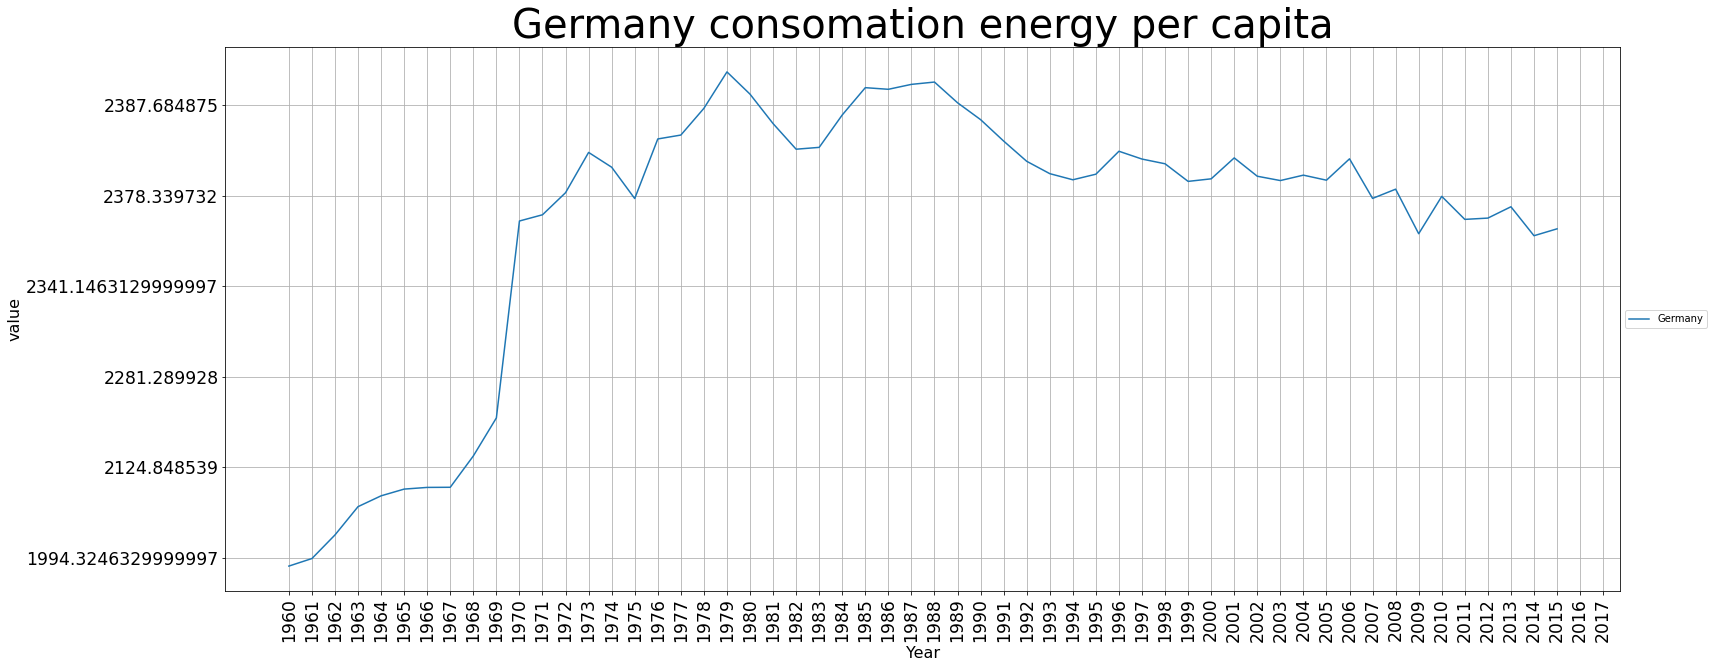

In [17]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_enegy_germa_melt, x="Year", y="value", hue="Country")
labels = df_enegy_germa_melt["Year"].unique()
labelsy= df_enegy_germa_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='Germany consomation energy per capita')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='xx-large')
g.set_yticklabels(labelsy,
    fontweight='light',
    fontsize='xx-large')

In [18]:
# labelsy= df_Chine_melt["value"].unique()
la = df_enegy_chine_melt["Year"].unique()
la

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [19]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [20]:
# df_enegy_chine_melt.head()

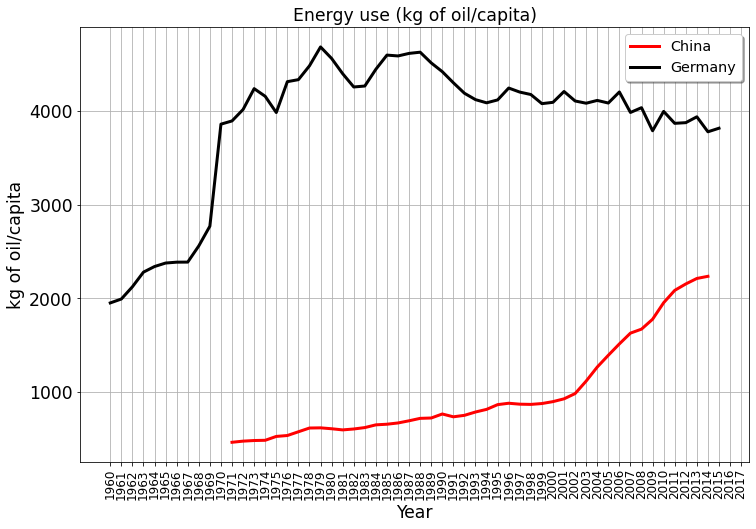

In [21]:
plt.rc('lines', linewidth=3, linestyle='-')

x = df_enegy_chine_melt["Year"]
y = df_enegy_chine_melt["value"]
# conso_energy_capita 'k--', label='Model length', loc='upper center'

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y, color="r", label='China')


x = df_enegy_germa_melt["Year"]
y = df_enegy_germa_melt["value"]
ax.plot(x, y, label='Germany',  color="black")


ax.set(xlabel='Year', ylabel='kg of oil/capita',
       title='Energy use (kg of oil/capita)')
ax.grid()
ax.set_xticklabels(df_enegy_chine_melt["Year"].unique(), rotation = 90)

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('white')


plt.show()

[Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '

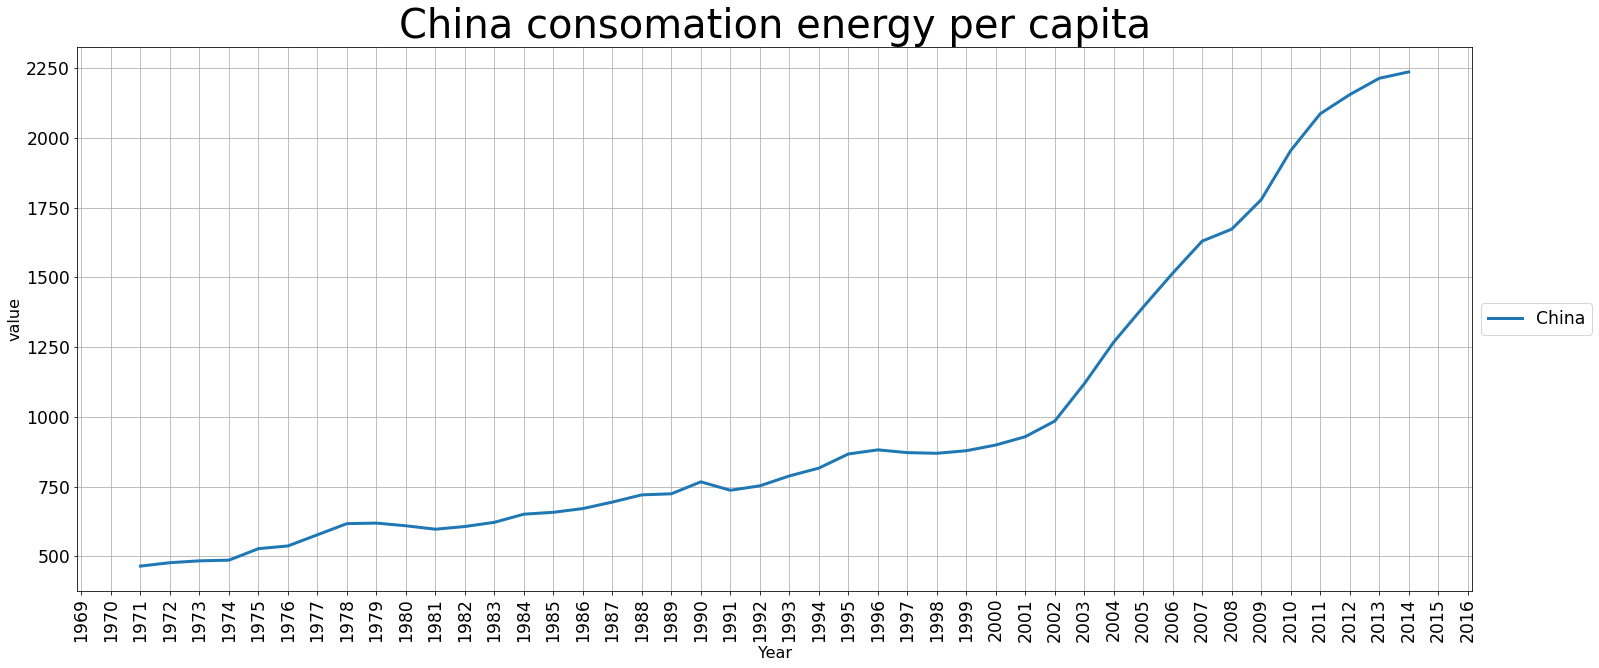

In [22]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_enegy_chine_melt, x="Year", y="value", hue="Country")
labels = df_enegy_chine_melt["Year"].unique()
labelsy= df_enegy_chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='China consomation energy per capita')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

In [23]:
conso_energy_capita = pd.concat([df_enegy_chine_melt, df_enegy_germa_melt])

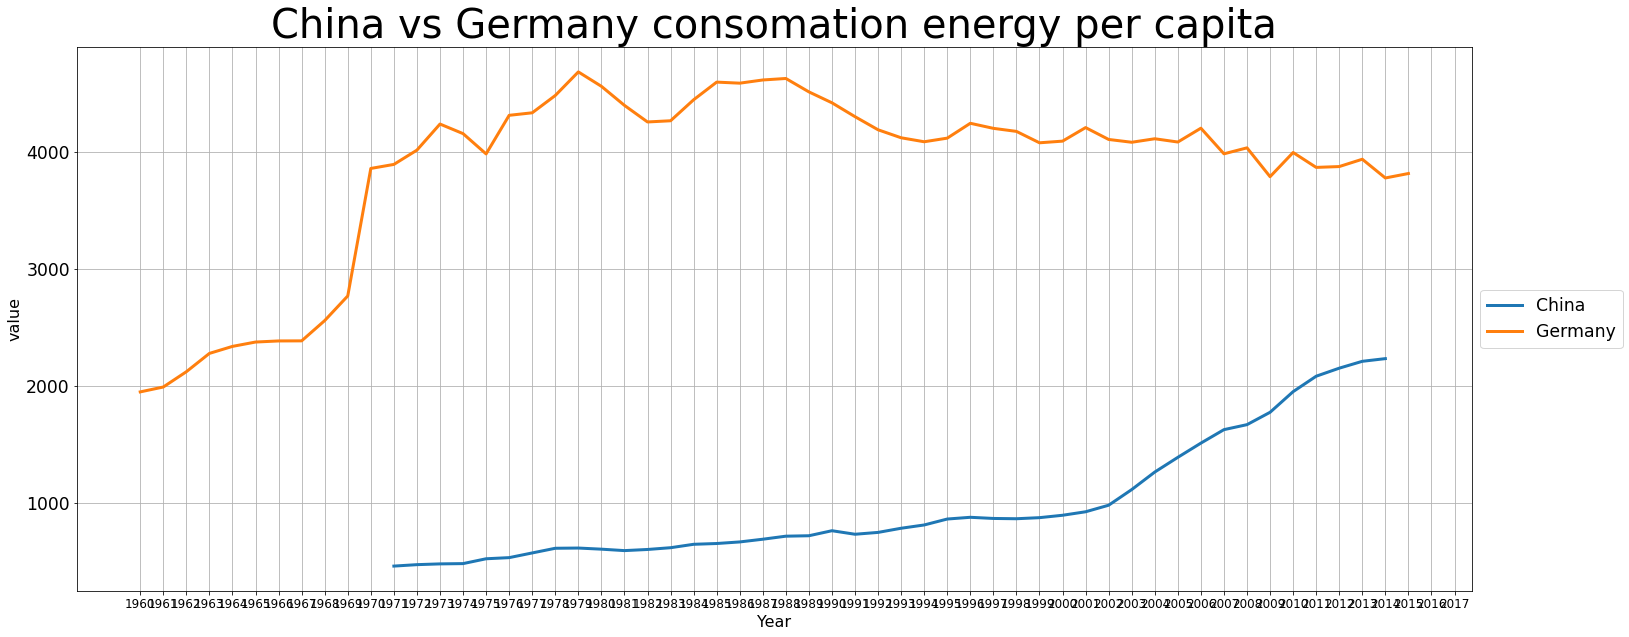

In [24]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=conso_energy_capita, x="Year", y="value", hue="Country")
# labels = df_Chine_melt["Year"].unique()
# labelsy= df_Chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='China vs Germany consomation energy per capita')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

In [25]:
df_carb_Germ_melt = carb_Germay.melt(id_vars=["Country Name"])
df_Germ_melt = renew_Germany.melt(id_vars=["Country Name"])
df_Germ_melt.columns = ["Country", "Year", "value"]
df_carb_Germ_melt.columns = ["Country", "Year", "value"]
print(df_Germ_melt.shape)

df_carb_Chine_melt = carb_China.melt(id_vars=["Country Name"])
df_Chine_melt = renew_Chine.melt(id_vars=["Country Name"])
df_Chine_melt.columns = ["Country", "Year", "value"]
df_carb_Chine_melt.columns = ["Country", "Year", "value"]
print(df_Chine_melt.shape)

(61, 3)
(61, 3)


In [26]:
df_carb_Chine_melt

,Country,Year,value
0,Chine,1960,95.934826
1,Chine,1961,94.717370
2,Chine,1962,93.619626
3,Chine,1963,93.075709
4,Chine,1964,91.984054
...,...,...,...
56,Chine,2016,70.831805
57,Chine,2017,NaN
58,Chine,2018,NaN
59,Chine,2019,NaN


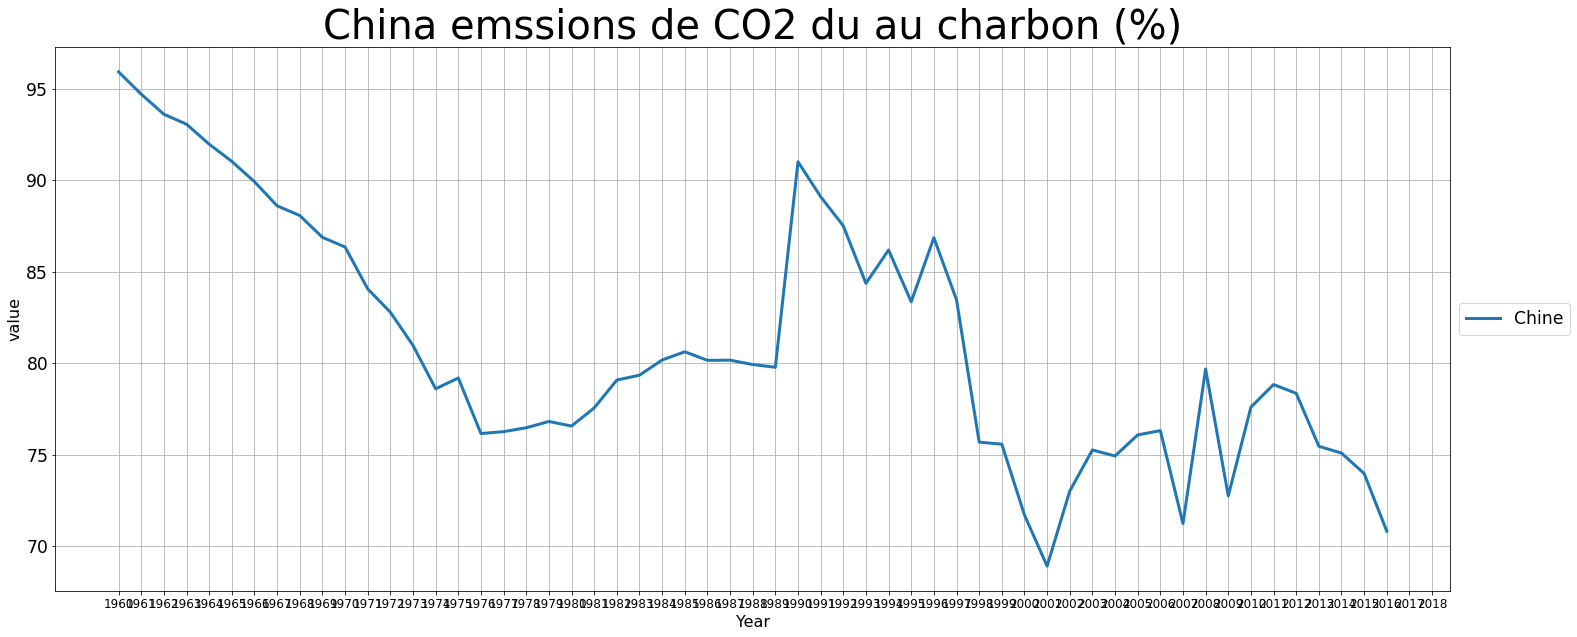

In [27]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_carb_Chine_melt, x="Year", y="value", hue="Country")
# labels = df_Chine_melt["Year"].unique()
# labelsy= df_Chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='China emssions de CO2 du au charbon (%)')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

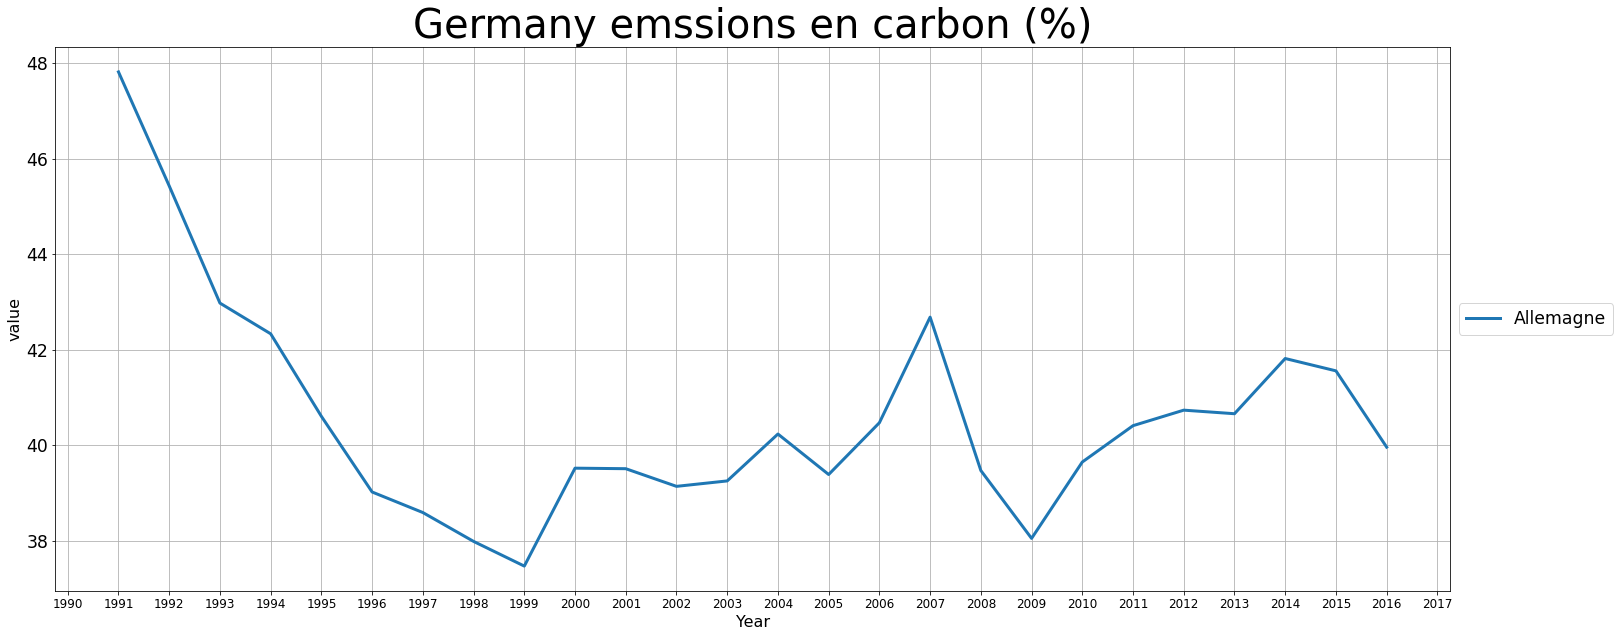

In [28]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_carb_Germ_melt, x="Year", y="value", hue="Country")
# labels = df_Chine_melt["Year"].unique()
# labelsy= df_Chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='Germany emssions en carbon (%)')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

In [29]:
carb_china_alemania = pd.concat([df_carb_Germ_melt, df_carb_Chine_melt])

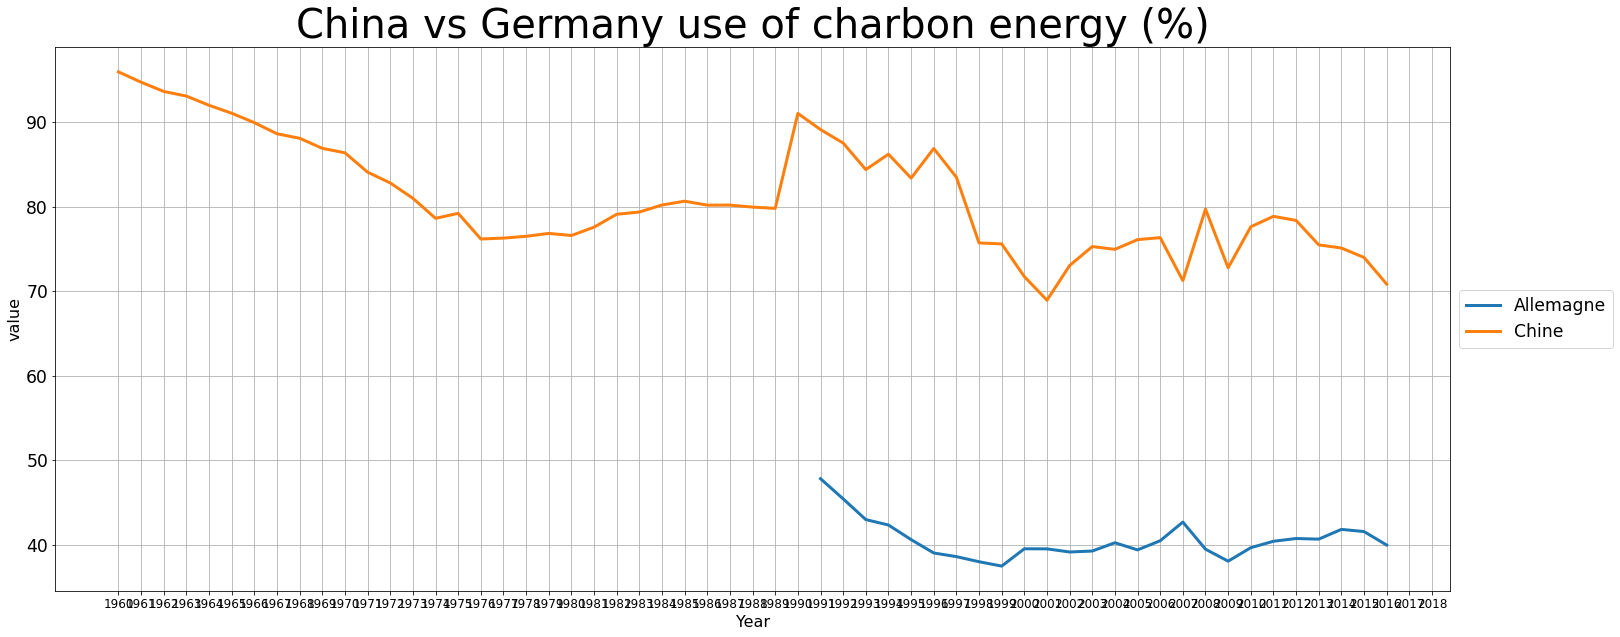

In [30]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=carb_china_alemania, x="Year", y="value", hue="Country")
# labels = df_Chine_melt["Year"].unique()
# labelsy= df_Chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='China vs Germany use of charbon energy (%)')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

In [31]:
df_Germ_melt['value'].unique()

array([        nan,  2.09803377,  1.98863281,  2.06262189,  2.11093109,
        2.26620206,  2.319749  ,  2.25217383,  2.82442182,  3.04511891,
        3.26371215,  3.70043759,  3.89967279,  4.41263679,  5.05846742,
        5.82524443,  6.76455101,  7.75322466,  9.4065879 ,  8.59224826,
        9.63006157, 10.29351964, 11.39435591, 12.01513573, 12.08907875,
       13.37887823, 14.2062527 ])

In [32]:
df_Chine_melt['value'].unique()

array([        nan, 34.08361405, 33.25847354, 32.9312779 , 31.6777918 ,
       31.24948417, 29.47211139, 30.53717546, 30.18348168, 29.73990148,
       30.50604898, 29.73071484, 28.45581538, 27.09820152, 23.94657959,
       20.24947926, 18.20381865, 17.09461008, 15.34937114, 14.60199657,
       13.91196227, 12.88431031, 11.69579699, 11.96856703, 11.8381669 ,
       12.22382301, 12.41335257])

In [33]:
df_Chine_melt["value"].unique()

array([        nan, 34.08361405, 33.25847354, 32.9312779 , 31.6777918 ,
       31.24948417, 29.47211139, 30.53717546, 30.18348168, 29.73990148,
       30.50604898, 29.73071484, 28.45581538, 27.09820152, 23.94657959,
       20.24947926, 18.20381865, 17.09461008, 15.34937114, 14.60199657,
       13.91196227, 12.88431031, 11.69579699, 11.96856703, 11.8381669 ,
       12.22382301, 12.41335257])

In [34]:
renew_china_alemania = pd.concat([df_Chine_melt, df_Germ_melt])
renew_china_alemania


,Country,Year,value
0,Chine,1960,NaN
1,Chine,1961,NaN
2,Chine,1962,NaN
3,Chine,1963,NaN
4,Chine,1964,NaN
...,...,...,...
56,Allemagne,2016,NaN
57,Allemagne,2017,NaN
58,Allemagne,2018,NaN
59,Allemagne,2019,NaN


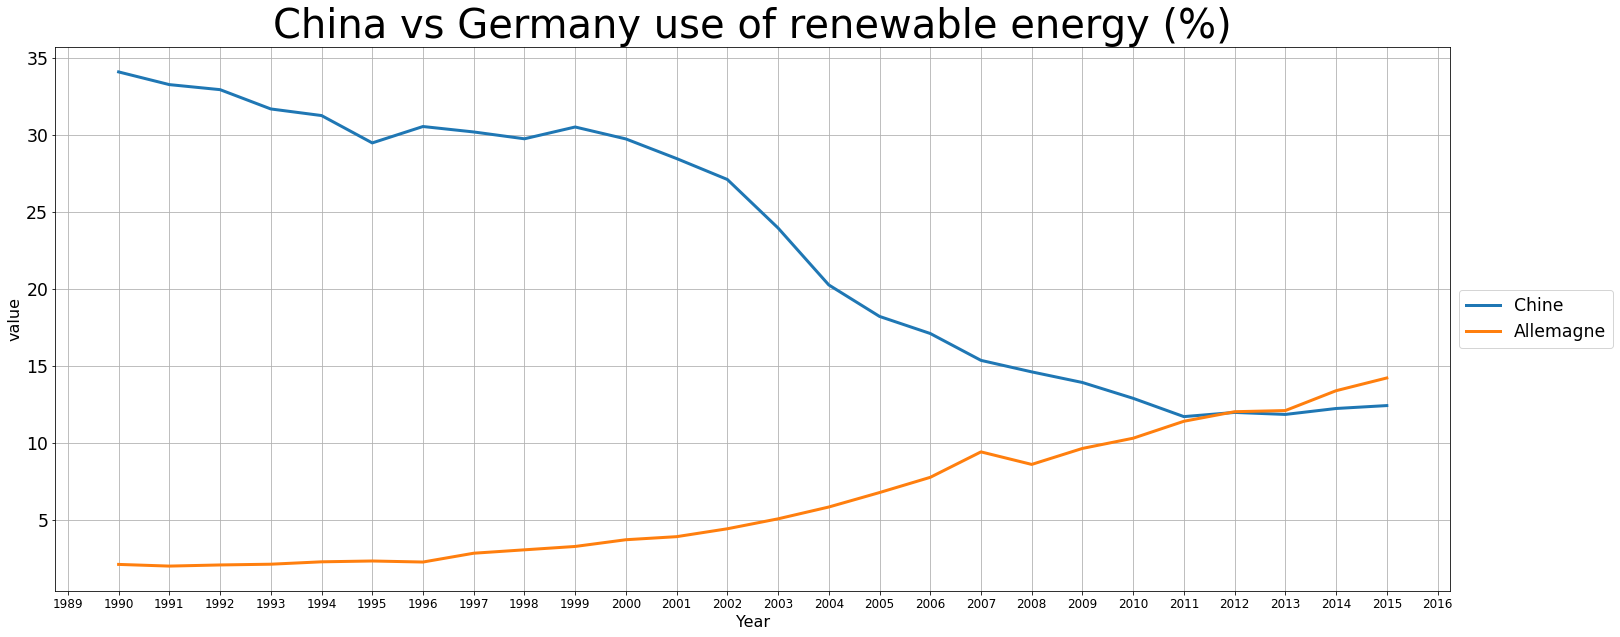

In [35]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=renew_china_alemania, x="Year", y="value", hue="Country")
# labels = df_Chine_melt["Year"].unique()
# labelsy= df_Chine_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='China vs Germany use of renewable energy (%)')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='xx-large')
# g.set_yticklabels(labelsy,
#     fontweight='light',
#     fontsize='xx-large')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


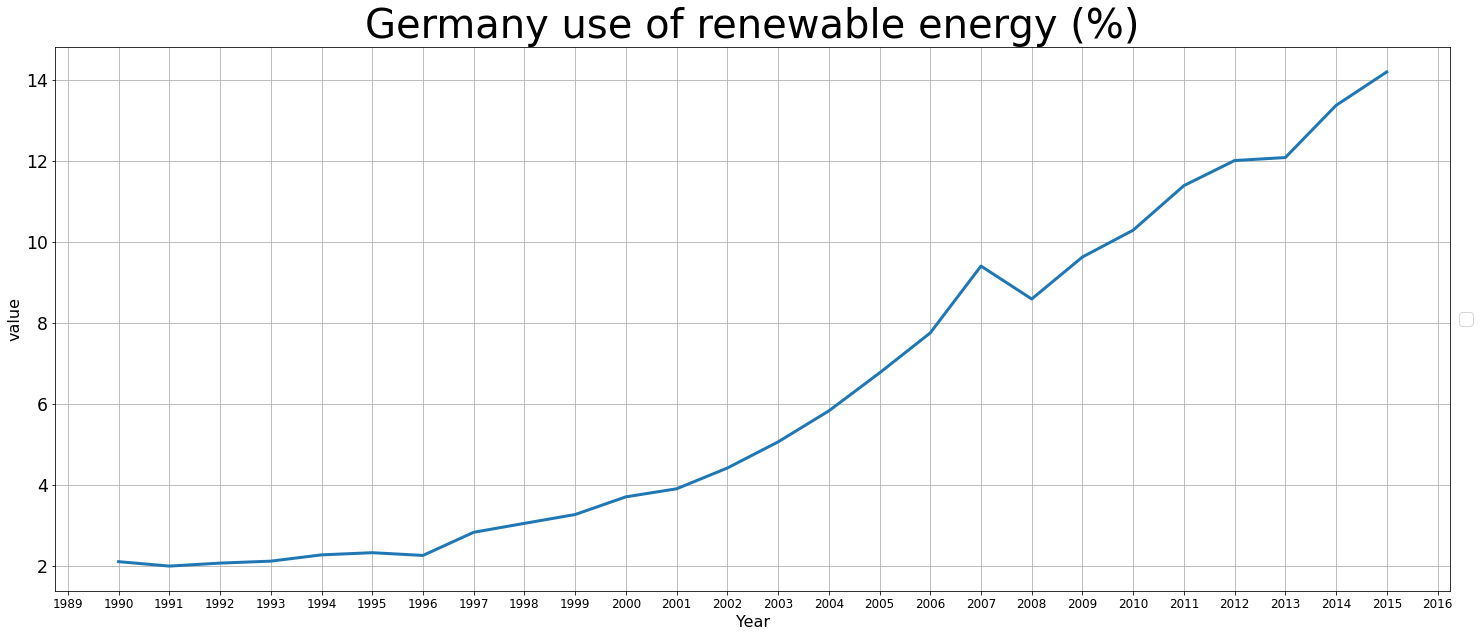

In [36]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_Germ_melt, x="Year", y="value")
# labels = df_Germ_melt["Year"].unique()
# labelsy= df_Germ_melt["value"].unique()
# # g.set_xticks(len(labels))
g.set(title='Germany use of renewable energy (%)')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='x-large')
# g.set_yticklabels(labelsy.astype(int),
#     fontweight='light',
#     fontsize='x-large')

In [37]:
df1["Country Name"].unique()

array(['China', 'United States', 'India', 'Russian Federation', 'Japan',
       'Germany', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Saudi Arabia',
       'Indonesia', 'Canada', 'Mexico', 'South Africa', 'Brazil',
       'United Kingdom', 'Australia', 'Turkey', 'Poland', 'Thailand',
       'Malaysia', 'Kazakhstan', 'Spain', 'Egypt, Arab Rep.',
       'United Arab Emirates', 'Ukraine', 'Argentina', 'Pakistan',
       'Vietnam', 'Iraq', 'Netherlands', 'Venezuela, RB', 'Algeria',
       'Philippines', 'Nigeria', 'Qatar', 'Czech Republic', 'Kuwait',
       'Colombia', 'Belgium', 'Uzbekistan', 'Chile', 'Bangladesh',
       'Turkmenistan', 'Romania', 'Israel', 'Oman', 'Greece', 'Austria',
       'Morocco', 'Belarus', 'Peru', 'Libya', 'Portugal', 'Finland',
       'Hungary', 'Serbia', 'Trinidad and Tobago', 'Hong Kong SAR, China',
       'Sweden', 'Bulgaria', 'Ecuador', 'Norway', 'Ireland', 'Azerbaijan',
       'Singapore', 'Angola', 'Switzerland', 'New Zealand',
       'Slovak Republic', 'Denmar

In [38]:
df_pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0


In [39]:
df_pop.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

## On conserve la surface de 2018

In [40]:
df_srf = df_srf[["Country Code", "2018"]]

In [41]:
df_pib.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [42]:
df1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,522789.522,433234.048,468928.626,577237.138,771617.474,876633.020,931575.681,968542.708,988014.478,1145607.470,1196193.735,1310310.775,1462168.579,1494859.884,1467192.369,1451501.276,1580260.647,1667029.201,1814908.310,1966553.428,2068969.071,2209708.531,2369501.723,2408540.605,2442918.730,2564699.800,2686532.208,2878694.009,3058241.330,3320285.15,3463089.131,3469510.048,3324344.519,3318055.614,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,6697654.489,7553070.247,7557789.676,8776040.416,9733538.120,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,3561878.111,3695708.943,3831354.940,4024748.853,4328904.501,4356770.034,4564952.958,4770194.948,4598487.673,4406329.539,4613100.668,4742292.745,4890861.250,4901796.244,4723209.677,4535800.308,4306748.487,4341878.347,4475192.132,4492555.377,4495463.308,4688373.177,4892526.068,4955081.421,4823403.118,4820847.219,4909533.614,5028674.444,5094354.081,5132919.92,5252112.088,5368715.354,5401010.623,5504669.379,5693684.894,5595794.329,5641309.133,5675701.926,5756075.232,5789727.291,5697285.888,5789030.561,5614110.994,5263505.457,5395532.125,5270047.385,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077


In [43]:
df2.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN


In [44]:
print(df1.shape)
print(df2.shape)

(218, 61)
(263, 6)


## Merge pour avoir Region et Income groupe dans le même dataFrame

In [45]:
df_co2 = df1.merge(df2, how="left", on="Country Code")
print(df_co2.shape)

(218, 66)


In [46]:
df_co2.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,522789.522,433234.048,468928.626,577237.138,771617.474,876633.020,931575.681,968542.708,988014.478,1145607.470,1196193.735,1310310.775,1462168.579,1494859.884,1467192.369,1451501.276,1580260.647,1667029.201,1814908.310,1966553.428,2068969.071,2209708.531,2369501.723,2408540.605,2442918.730,2564699.800,2686532.208,2878694.009,3058241.330,3320285.15,3463089.131,3469510.048,3324344.519,3318055.614,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,6697654.489,7553070.247,7557789.676,8776040.416,9733538.120,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,3561878.111,3695708.943,3831354.940,4024748.853,4328904.501,4356770.034,4564952.958,4770194.948,4598487.673,4406329.539,4613100.668,4742292.745,4890861.250,4901796.244,4723209.677,4535800.308,4306748.487,4341878.347,4475192.132,4492555.377,4495463.308,4688373.177,4892526.068,4955081.421,4823403.118,4820847.219,4909533.614,5028674.444,5094354.081,5132919.92,5252112.088,5368715.354,5401010.623,5504669.379,5693684.894,5595794.329,5641309.133,5675701.926,5756075.232,5789727.291,5697285.888,5789030.561,5614110.994,5263505.457,5395532.125,5270047.385,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077,North America,High income,NaN,United States,NaN


In [47]:
print(df_co2["Indicator Name"].unique())

['CO2 emissions (kt)']


In [48]:
df_co2 = df_co2.drop('Indicator Name', 1)
df_co2 = df_co2.drop('Indicator Code', 1)
df_co2 = df_co2.drop('Unnamed: 5', 1)
df_co2 = df_co2.drop('TableName', 1)
df_co2 = df_co2.drop('SpecialNotes', 1)

In [49]:
df_co2 = df_co2.sort_values(by="Country Name")

In [50]:
df_co2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,IncomeGroup
106,Afghanistan,AFG,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,1672.152,1895.839,1532.806,1639.149,1917.841,2126.860,1987.514,2390.884,2159.863,2240.537,1760.16,1983.847,2101.191,2522.896,2830.924,3509.319,3142.619,3124.284,2867.594,2775.919,2614.571,2438.555,1393.460,1345.789,1294.451,1243.113,1177.107,1096.433,1041.428,821.408,773.737,817.741,1070.764,1213.777,916.750,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488,8672.455,South Asia,Low income
131,Albania,ALB,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,3744.007,4352.729,5643.513,5291.481,4345.395,4594.751,4950.450,5720.520,6494.257,7587.023,5170.47,7341.334,7308.331,7631.027,7825.378,7880.383,8056.399,7444.010,7326.666,8984.150,5515.168,4286.723,2515.562,2335.879,1925.175,2086.523,2016.850,1543.807,1752.826,2984.938,3021.608,3223.293,3751.341,4294.057,4165.712,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753,4536.079,Europe & Central Asia,Upper middle income
31,Algeria,DZA,6160.560,6065.218,5669.182,5427.160,5650.847,6596.933,8430.433,8441.434,9061.157,11276.025,15075.037,18668.697,28349.577,38312.816,31906.567,32031.245,39170.894,41891.808,62529.684,45621.147,66519.38,46438.888,39269.903,52625.117,71103.130,72786.283,76277.267,84120.980,83948.631,80046.943,76970.330,79049.519,80138.618,82210.473,86416.522,95294.329,97098.493,87340.606,106999.393,92045.367,87861.320,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.500,121187.016,129987.816,134465.223,145411.218,153133.920,150005.969,Middle East & North Africa,Lower middle income
205,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Upper middle income
182,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.037,407.037,407.037,410.704,407.037,425.372,454.708,465.709,491.378,513.380,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,465.709,469.376,Europe & Central Asia,High income


## Transposition des donnees

In [51]:
df_co2_melt = df_co2.melt(id_vars=["Country Name", "Country Code", "Region","IncomeGroup"])

In [52]:
df_co2_melt.head()

,Country Name,Country Code,Region,IncomeGroup,variable,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
2,Algeria,DZA,Middle East & North Africa,Lower middle income,1960,6160.560
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,1960,NaN
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN


In [53]:
df_co2_melt.columns = ["Country", "Country Code", "Region", "IncomeGroup", "Year", "CO2"]

In [54]:
df_co2_melt = df_co2_melt.sort_values(by=["Country", "Year"])

In [55]:
df_co2_melt.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
218,Afghanistan,AFG,South Asia,Low income,1961,491.378
436,Afghanistan,AFG,South Asia,Low income,1962,689.396
654,Afghanistan,AFG,South Asia,Low income,1963,707.731
872,Afghanistan,AFG,South Asia,Low income,1964,839.743


In [56]:
df_co2_melt['CO2_Region_Year'] = df_co2_melt.groupby(['Region', 'Year'])["CO2"].transform('sum')

In [57]:
df_co2_melt['CO2_IncomeGroup_Year'] = df_co2_melt.groupby(['IncomeGroup', 'Year'])["CO2"].transform('sum')

In [58]:
df_co2_melt.head(20)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276
436,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327
654,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923
872,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009
1090,Afghanistan,AFG,South Asia,Low income,1965,1008.425,209767.068,61011.546
1308,Afghanistan,AFG,South Asia,Low income,1966,1092.766,216364.001,66545.049
1526,Afghanistan,AFG,South Asia,Low income,1967,1283.450,219829.316,72001.545
1744,Afghanistan,AFG,South Asia,Low income,1968,1224.778,241530.622,83519.592
1962,Afghanistan,AFG,South Asia,Low income,1969,942.419,244372.547,92525.744


In [59]:
df_co2_region_year = df_co2_melt[["Region", "Year", "CO2_Region_Year"]]
print(df_co2_region_year.shape)

(12426, 3)


In [60]:
df_co2_region_year = df_co2_region_year.drop_duplicates()
print(df_co2_region_year.shape)

(456, 3)


In [61]:
df_co2_region_year = df_co2_region_year[df_co2_region_year["Region"].notnull()]
print(df_co2_region_year.shape)

(399, 3)


In [62]:
df_co2_region_year.head(20)

,Region,Year,CO2_Region_Year
0,South Asia,1960,151645.118
218,South Asia,1961,162624.116
436,South Asia,1962,179019.273
654,South Asia,1963,194453.676
872,South Asia,1964,191982.118
1090,South Asia,1965,209767.068
1308,South Asia,1966,216364.001
1526,South Asia,1967,219829.316
1744,South Asia,1968,241530.622
1962,South Asia,1969,244372.547


In [63]:
df_co2_Incomegroup_year = df_co2_melt[["IncomeGroup", "Year", "CO2_IncomeGroup_Year"]]
print(df_co2_Incomegroup_year.shape)

(12426, 3)


In [64]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year.drop_duplicates()
print(df_co2_Incomegroup_year.shape)

(285, 3)


In [65]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year[df_co2_Incomegroup_year["IncomeGroup"].notnull()]
print(df_co2_Incomegroup_year.shape)

(228, 3)


In [66]:
df_co2_Incomegroup_year_pivot = df_co2_Incomegroup_year.pivot("IncomeGroup", "Year", "CO2_IncomeGroup_Year")

In [67]:
df_co2_Incomegroup_year_pivot.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,5163044.325,5277047.688,5527628.466,5838454.387,6133424.200,6405790.625,6686547.146,6988542.931,7361348.486,7843353.634,8526537.736,8697551.948,9131515.729,9612890.153,9396225.458,9101655.348,9601225.426,9789276.520,1.004391e+07,1.030950e+07,1.008981e+07,9696252.064,9336097.659,9305265.523,9547826.572,9661694.256,9676585.943,9946070.106,1.029126e+07,1.054639e+07,1.028101e+07,1.131444e+07,1.169822e+07,1.186127e+07,1.200802e+07,1.206387e+07,1.241962e+07,1.248742e+07,1.244029e+07,1.260434e+07,1.301049e+07,1.296961e+07,1.304444e+07,1.323757e+07,1.344489e+07,1.347258e+07,1.351959e+07,1.356978e+07,1.339555e+07,1.267893e+07,1.308972e+07,1.285161e+07,1.278680e+07,1.279028e+07,1.270110e+07,1.200871e+07,1.177276e+07
Low income,36460.981,39706.276,43934.327,46823.923,51437.009,61011.546,66545.049,72001.545,83519.592,92525.744,102257.962,140196.744,120743.309,129371.760,136207.048,142433.614,146177.621,151934.811,1.473254e+05,1.591515e+05,1.619934e+05,167050.185,166496.468,180508.075,194754.370,202271.720,216543.684,241009.908,2.690551e+05,2.787140e+05,1.914797e+05,1.954218e+05,1.875891e+05,1.775231e+05,1.677726e+05,1.607613e+05,1.542487e+05,1.515901e+05,1.499180e+05,1.597235e+05,1.647253e+05,1.685133e+05,1.573840e+05,1.792796e+05,1.830970e+05,1.870720e+05,1.956271e+05,2.013183e+05,2.152786e+05,2.000422e+05,1.990301e+05,1.843218e+05,1.737975e+05,1.668228e+05,1.748096e+05,1.607649e+05,1.643183e+05
Lower middle income,211160.528,224457.070,246440.735,268362.061,284687.545,313106.795,328071.822,326883.714,353737.155,367008.028,415936.809,442408.882,453024.847,491073.639,505297.932,522756.519,550292.022,574670.238,6.081023e+05,6.394991e+05,6.878742e+05,697929.109,712989.478,758588.623,797755.850,850531.314,903750.485,950336.053,1.013302e+06,1.035524e+06,1.080298e+06,1.135380e+06,1.976561e+06,1.934284e+06,1.872323e+06,1.956774e+06,2.026498e+06,2.018188e+06,2.072746e+06,2.138228e+06,2.236874e+06,2.252341e+06,2.306499e+06,2.425049e+06,2.524293e+06,2.640042e+06,2.738802e+06,2.888210e+06,3.078791e+06,3.200253e+06,3.316893e+06,3.499128e+06,3.714345e+06,3.736262e+06,3.982718e+06,4.101459e+06,4.229048e+06
Upper middle income,2708981.582,2543500.873,2530285.005,2659411.076,2818760.561,3008249.119,3209105.377,3265848.535,3432121.316,3689918.750,4060414.095,4373858.254,4603467.459,4846648.231,5027365.325,5361462.028,5625398.020,5920184.483,6.261417e+06,6.411097e+06,6.517300e+06,6459292.155,6750341.945,6902001.731,7121860.383,7629578.535,7795447.946,7998354.057,8.341677e+06,8.397610e+06,8.134213e+06,8.212815e+06,7.450317e+06,7.561655e+06,7.555025e+06,7.829888e+06,8.029212e+06,8.046098e+06,7.889209e+06,8.013473e+06,8.183970e+06,8.386015e+06,8.787118e+06,9.701668e+06,1.059069e+07,1.137304e+07,1.226027e+07,1.252093e+07,1.367714e+07,1.353731e+07,1.500151e+07,1.623133e+07,1.670244e+07,1.684622e+07,1.693218e+07,1.683839e+07,1.671832e+07


In [68]:
df_co2_region_year_pivot = df_co2_region_year.pivot("Region", "Year", "CO2_Region_Year")

In [69]:
df_co2_region_year_pivot

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1202974.018,1039169.128,950919.106,995212.799,1048960.018,1142956.229,1234513.885,1243828.065,1381505.580,1609468.302,1996773.175,2181993.345,2295384.319,2445977.008,2472240.062,2608894.484,2729179.418,2927446.774,3087918.361,3205988.427,3192937.574,3169630.122,3289254.996,3388208.991,3628305.816,3805198.229,3937246.899,4131451.219,4466046.634,4605146.945,4654468.095,4846849.916,5060874.371,5330255.858,5624246.582,5968746.564,6237607.337,6325145.961,5980290.280,6097205.241,6316583.516,6439567.362,6880949.484,7631661.391,8435383.450,9102066.052,9753871.635,1.000234e+07,1.094005e+07,1.090385e+07,1.227860e+07,1.335693e+07,1.372970e+07,1.390204e+07,1.386372e+07,1.386268e+07,1.368487e+07
Europe & Central Asia,3166989.882,3275210.386,3457973.666,3702687.244,3895069.065,4076369.212,4254640.417,4397913.774,4593672.902,4831862.887,5124889.190,5342279.951,5591679.955,5857761.142,5913008.164,6009046.894,6321753.986,6428581.030,6640188.932,6799021.370,6842049.948,6604549.359,6608113.683,6619752.741,6639785.562,7006078.525,7028414.222,7072828.926,7135123.922,7152494.501,6737470.775,7546686.000,7576883.745,7212831.319,6759256.422,6712197.811,6758438.681,6507648.884,6491246.393,6446288.973,6495910.817,6578909.695,6566108.198,6756762.862,6799384.403,6805038.917,7000394.675,6.970542e+06,6.958206e+06,6.392538e+06,6.690904e+06,6.679151e+06,6.654355e+06,6.501903e+06,6.273991e+06,5.600213e+06,5.639908e+06
Latin America & Caribbean,297987.754,304911.050,323865.773,323561.412,348911.383,359725.366,377330.633,406677.634,432240.291,470289.083,519056.516,544322.146,570038.817,622465.916,656183.981,664214.711,706858.254,727778.489,781448.701,836395.029,878723.210,869519.040,893295.868,852141.127,866475.430,893548.891,910365.753,955953.897,978795.640,1036253.863,996045.208,1014468.216,1025069.513,1063639.019,1101115.759,1123132.427,1177466.366,1242727.965,1320208.008,1344259.861,1337483.245,1368649.078,1385289.924,1419202.340,1428472.516,1503488.335,1544258.041,1.569747e+06,1.656718e+06,1.621753e+06,1.706255e+06,1.728818e+06,1.808487e+06,1.845113e+06,1.870075e+06,1.851263e+06,1.815792e+06
Middle East & North Africa,98634.966,104861.532,114531.411,133046.094,154648.391,184329.089,210771.826,225010.787,260456.009,302333.149,321606.901,361951.235,389167.709,459412.761,466321.389,460307.509,543526.407,572253.685,603320.509,634812.705,644002.207,624779.793,630426.973,673217.196,720774.519,762226.287,813652.295,824924.653,880817.067,910068.726,896907.863,1003859.585,1070969.352,1173891.041,1228507.339,1186410.179,1211573.133,1188328.020,1267953.258,1353669.383,1473950.650,1497085.753,1516011.140,1616164.244,1748161.576,1834094.054,1942464.905,1.928725e+06,2.086633e+06,2.184454e+06,2.268890e+06,2.302443e+06,2.513149e+06,2.492354e+06,2.630361e+06,2.648172e+06,2.608737e+06
North America,3083748.982,3074863.841,3194551.054,3330490.411,3493998.274,3643256.175,3821399.035,3977818.587,4135118.219,4332347.814,4670617.563,4709608.774,4946342.960,5152241.343,4988902.162,4803931.348,5012888.009,5150899.221,5307183.094,5344326.137,5166880.007,4966192.431,4721955.563,4751016.538,4901231.526,4915085.452,4900938.166,5120294.439,5349225.249,5419136.604,5259086.722,5248166.396,5350974.408,5474794.330,5551735.324,5601089.477,5732060.049,5864534.091,5908065.048,6020572.275,6228582.850,6124249.366,6161201.725,6229363.921,6310015.919,6351735.378,6269931.942,6.361607e+06,6.176552e+06,5.796174e+06,5.923404e+06,5.793266e+06,5.600088e+06,5.690058e+06,5.766677e+06,5.676901e+06,5.551809e+06
South Asia,151645.118,162624.116,179019.273,194453.676,191982.118,209767.068,216364.001,219829.316,241530.622,244372.547,249319.330

# Analyse Monovarie

### Evolution d'emition de CO2 par region

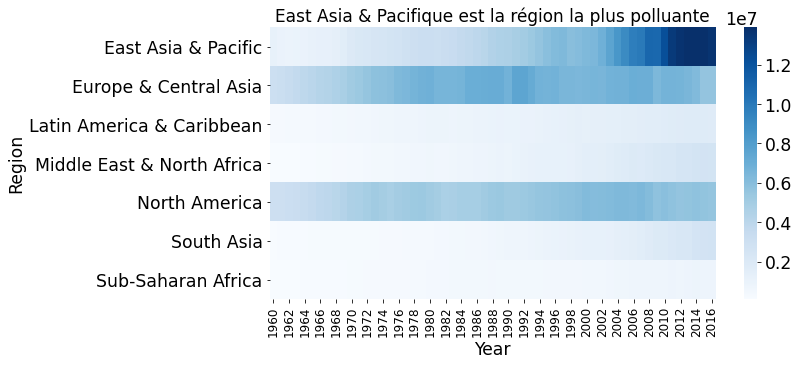

In [70]:
plt.figure(figsize=(10,5))
h1 =sns.heatmap(df_co2_region_year_pivot, cmap="Blues")
h1.set(title='East Asia & Pacifique est la région la plus polluante')
h1.title.set_size(17)

### Evolution des émissions de CO2 par niveau de Income

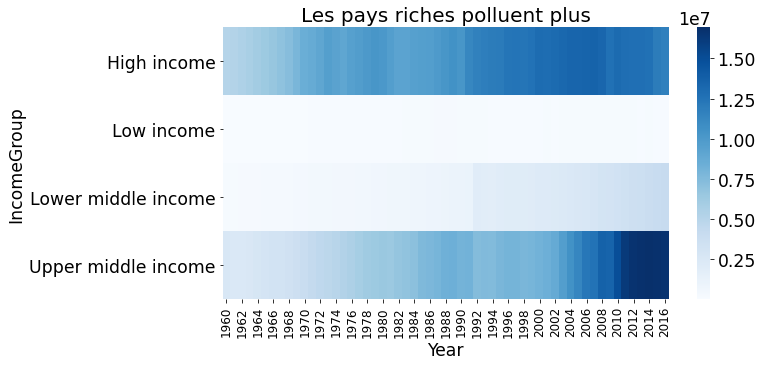

In [71]:
plt.figure(figsize=(10,5))
g = sns.heatmap(df_co2_Incomegroup_year_pivot, cmap="Blues")
g.set(title='Les pays riches polluent plus')
g.title.set_size(20)

In [72]:
df_co2_Incomegroup_year.head(2)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

,IncomeGroup,Year,CO2_IncomeGroup_Year
0,Low income,1960,36460.981
218,Low income,1961,39706.276


[Text(0, 0, '36460'),
 Text(0, 0, '39706'),
 Text(0, 0, '43934'),
 Text(0, 0, '46823'),
 Text(0, 0, '51437'),
 Text(0, 0, '61011'),
 Text(0, 0, '66545'),
 Text(0, 0, '72001'),
 Text(0, 0, '83519'),
 Text(0, 0, '92525')]

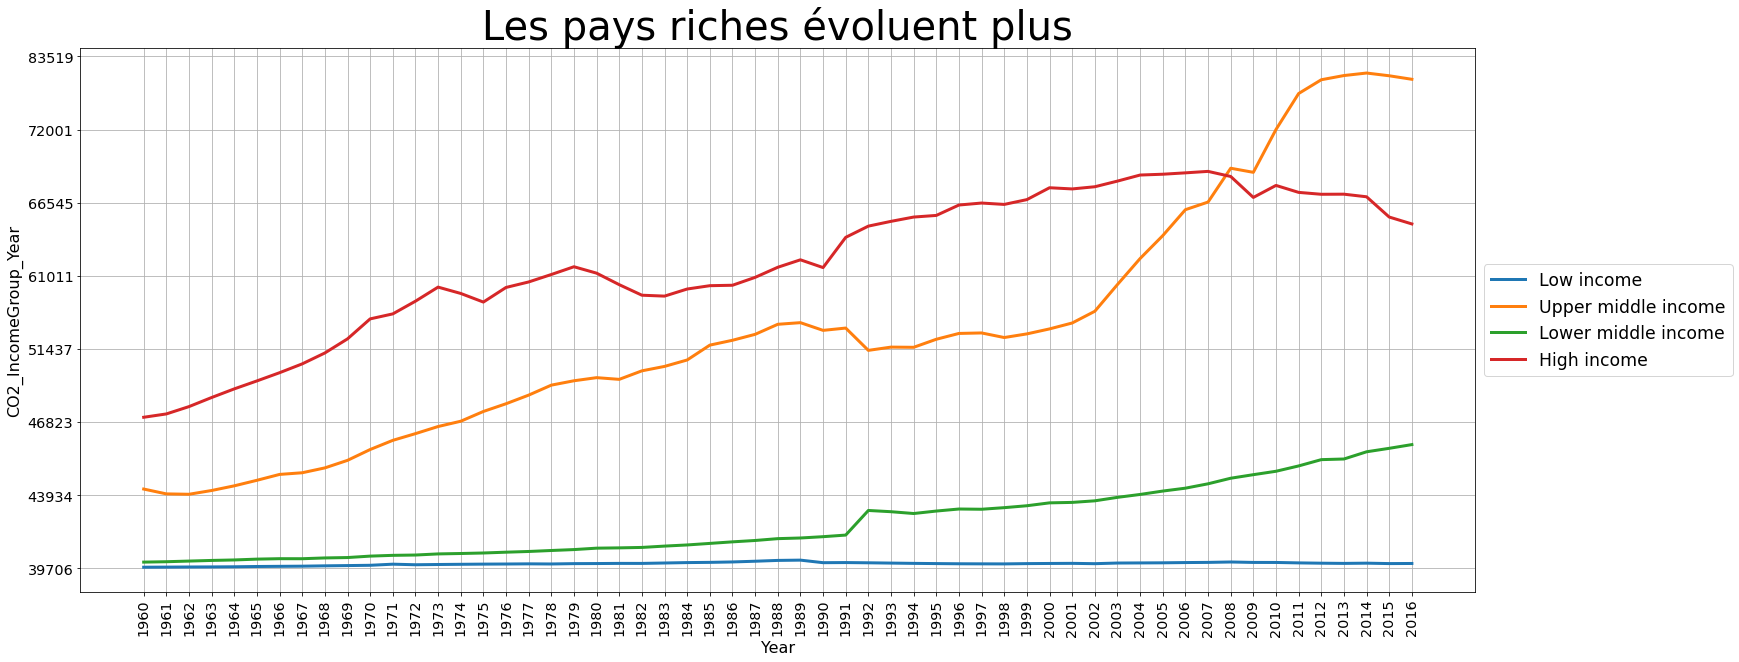

In [73]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_Incomegroup_year, x="Year", y="CO2_IncomeGroup_Year", hue="IncomeGroup")
labels = df_co2_Incomegroup_year["Year"].unique()
labelsy=df_co2_Incomegroup_year["CO2_IncomeGroup_Year"].unique()
# g.set_xticks(len(labels))
g.set(title='Les pays riches évoluent plus')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')


[Text(0, 0, '151645'),
 Text(0, 0, '162624'),
 Text(0, 0, '179019'),
 Text(0, 0, '194453'),
 Text(0, 0, '191982'),
 Text(0, 0, '209767'),
 Text(0, 0, '216364'),
 Text(0, 0, '219829'),
 Text(0, 0, '241530'),
 Text(0, 0, '244372')]

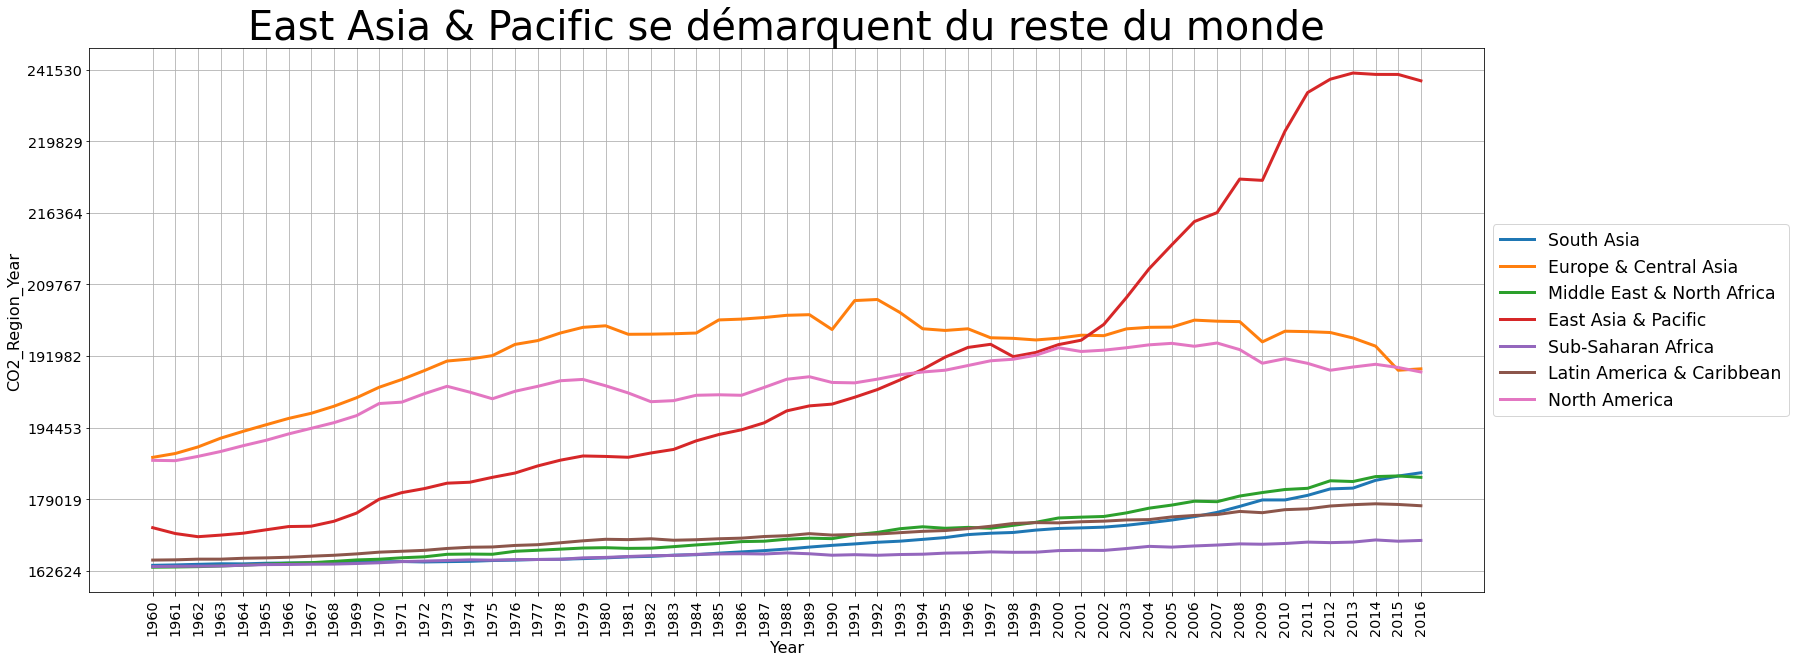

In [74]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_region_year, x="Year", y="CO2_Region_Year", hue="Region")
labels = df_co2_region_year["Year"].unique()
labelsy=df_co2_region_year["CO2_Region_Year"].unique()
g.set(title='East Asia & Pacific se démarquent du reste du monde')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')

In [75]:
df1['Country Name'] = df1['Country Name'].astype("category")

In [76]:
df1.dtypes

Country Name      category
Country Code        object
Indicator Name      object
Indicator Code      object
1960               float64
                    ...   
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
Length: 61, dtype: object

In [77]:
df_co2.shape

(218, 61)

In [78]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [79]:
df_pib.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,AFG,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.881570e+10
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199643e+09,2.258516e+09,2.545967e+09,3.212119e+09,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [80]:
df_pib_melt = df_pib.melt(id_vars=["Country Code"])

In [81]:
df_pib_melt.head()

,Country Code,variable,value
0,ABW,1960,NaN
1,AFG,1960,537777811.1
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN


In [82]:
df_pib_melt.columns = ["Country Code", "Year", "PIB"]

In [83]:
df_pop_melt = df_pop.melt(id_vars=["Country Code"])

In [84]:
df_pop_melt.columns = ["Country Code", "Year", "Population"]

In [85]:
df_pib_melt.head(2)

,Country Code,Year,PIB
0,ABW,1960,NaN
1,AFG,1960,537777811.1


In [86]:
df_pop_melt.head(2)

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996973.0


In [87]:
df_srf.columns = ["Country Code", "Surface"]

In [88]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_srf, how="left", on="Country Code")
print(df_pib_melt.shape)

(15840, 3)
(15840, 4)


In [89]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_pop_melt, how="left", on=["Country Code", "Year"])
print(df_pib_melt.shape)

(15840, 4)
(15840, 5)


In [90]:
print(df_co2_melt.shape)
df_all = df_co2_melt.merge(df_pib_melt, how="left", on=["Country Code", "Year"])
print(df_all.shape)

(12426, 8)
(12426, 11)


In [91]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [92]:
df_pib_melt.head(2)

,Country Code,Year,PIB,Surface,Population
0,ABW,1960,NaN,180.0,54211.0
1,AFG,1960,537777811.1,652860.0,8996973.0


In [93]:
df_all['PIB/Capita'] = df_all['PIB']/df_all['Population']

In [94]:
df_all['CO2/Capita'] = df_all['CO2']/df_all['Population']

In [95]:
df_all['CO2/PIB'] = df_all['CO2']/df_all['PIB']

In [96]:
df_all.head(100)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981,5.377778e+08,652860.0,8996973.0,59.773194,0.000046,7.705245e-07
1,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276,5.488889e+08,652860.0,9169410.0,59.860874,0.000054,8.952231e-07
2,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327,5.466667e+08,652860.0,9351441.0,58.458015,0.000074,1.261090e-06
3,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923,7.511112e+08,652860.0,9543205.0,78.706388,0.000074,9.422453e-07
4,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009,8.000000e+08,652860.0,9744781.0,82.095231,0.000086,1.049679e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,ALB,Europe & Central Asia,Upper middle income,1998,1752.826,6491246.393,7889209.469,2.545967e+09,28750.0,3128530.0,813.790263,0.000560,6.884715e-07
96,Albania,ALB,Europe & Central Asia,Upper middle income,1999,2984.938,6446288.973,8013473.098,3.212119e+09,28750.0,3108778.0,1033.241693,0.000960,9.292738e-07
97,Albania,ALB,Europe & Central Asia,Upper middle income,2000,3021.608,6495910.817,8183970.263,3.480355e+09,28750.0,3089027.0,1126.683318,0.000978,8.681895e-07
98,Albania,ALB,Europe & Central Asia,Upper middle income,2001,3223.293,6578909.695,8386014.629,3.922099e+09,28750.0,3060173.0,1281.659393,0.001053,8.218285e-07


In [97]:
df_all.columns

Index(['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'CO2',
       'CO2_Region_Year', 'CO2_IncomeGroup_Year', 'PIB', 'Surface',
       'Population', 'PIB/Capita', 'CO2/Capita', 'CO2/PIB'],
      dtype='object')

In [98]:
print(df_all.shape)
df_corr = df_all[['CO2', 'PIB', 'Surface', 'Population', 'PIB/Capita', 'CO2/Capita', 'CO2/PIB']].drop_duplicates()
print(df_corr.shape)

(12426, 14)
(12396, 7)


In [99]:
df_corr.head()

,CO2,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
0,414.371,537777811.1,652860.0,8996973.0,59.773194,0.000046,7.705245e-07
1,491.378,548888895.6,652860.0,9169410.0,59.860874,0.000054,8.952231e-07
2,689.396,546666677.8,652860.0,9351441.0,58.458015,0.000074,1.261090e-06
3,707.731,751111191.1,652860.0,9543205.0,78.706388,0.000074,9.422453e-07
4,839.743,800000044.4,652860.0,9744781.0,82.095231,0.000086,1.049679e-06


# EXTRACT COUNTRIES WITH THEIR CORRELATION CO2/PIB

In [100]:
countries = df_all["Country"].unique().tolist()

In [101]:
df_Alemania = df_all[df_all["Country"]=="Germany"][["Country", 'CO2', 'PIB']].drop_duplicates()

In [102]:
import math

In [103]:
positive_dict_of_countries_according_PIB_CO2_corr = {}
negative_dict_of_countries_according_PIB_CO2_corr = {}
indxP = 0
indxN = 0
for country in countries:
    temp = df_all[df_all["Country"]==country][["Country", 'CO2', 'PIB']].drop_duplicates()
    if temp.corr()["PIB"][0]>0 and not math.isnan(temp.corr()["PIB"][0]):
        positive_dict_of_countries_according_PIB_CO2_corr[indxP] = (country , temp.corr()["PIB"][0])
        indxP += 1
    elif not math.isnan(temp.corr()["PIB"][0]):
        negative_dict_of_countries_according_PIB_CO2_corr[indxN] = (country , temp.corr()["PIB"][0])
        indxN += 1
        

In [104]:
b = positive_dict_of_countries_according_PIB_CO2_corr.items()
print(sorted(b))
# b = b.sorted(key=lambda x:x[1][1])
# print(b)

[(0, ('Afghanistan', 0.9459049257219457)), (1, ('Albania', 0.02734881790906836)), (2, ('Algeria', 0.8677806234395782)), (3, ('Andorra', 0.6005072026004475)), (4, ('Angola', 0.9653740803699465)), (5, ('Antigua and Barbuda', 0.7521599058322416)), (6, ('Argentina', 0.9097698000239125)), (7, ('Armenia', 0.8022491261311975)), (8, ('Aruba', 0.6243242694770029)), (9, ('Australia', 0.8355759939137194)), (10, ('Austria', 0.7296779991405956)), (11, ('Azerbaijan', 0.0026874978521231087)), (12, ('Bahrain', 0.9596994736138096)), (13, ('Bangladesh', 0.9427828221398199)), (14, ('Barbados', 0.934998791499511)), (15, ('Belarus', 0.09358084156429206)), (16, ('Belize', 0.9400001048946862)), (17, ('Benin', 0.9845999520949712)), (18, ('Bermuda', 0.6366096568019373)), (19, ('Bhutan', 0.9237900385594157)), (20, ('Bolivia', 0.9390685565950042)), (21, ('Bosnia and Herzegovina', 0.9404237230589285)), (22, ('Botswana', 0.9378824465943261)), (23, ('Brazil', 0.9099752177309378)), (24, ('Brunei Darussalam', 0.47158

In [105]:
print(positive_dict_of_countries_according_PIB_CO2_corr)

{0: ('Afghanistan', 0.9459049257219457), 1: ('Albania', 0.02734881790906836), 2: ('Algeria', 0.8677806234395782), 3: ('Andorra', 0.6005072026004475), 4: ('Angola', 0.9653740803699465), 5: ('Antigua and Barbuda', 0.7521599058322416), 6: ('Argentina', 0.9097698000239125), 7: ('Armenia', 0.8022491261311975), 8: ('Aruba', 0.6243242694770029), 9: ('Australia', 0.8355759939137194), 10: ('Austria', 0.7296779991405956), 11: ('Azerbaijan', 0.0026874978521231087), 12: ('Bahrain', 0.9596994736138096), 13: ('Bangladesh', 0.9427828221398199), 14: ('Barbados', 0.934998791499511), 15: ('Belarus', 0.09358084156429206), 16: ('Belize', 0.9400001048946862), 17: ('Benin', 0.9845999520949712), 18: ('Bermuda', 0.6366096568019373), 19: ('Bhutan', 0.9237900385594157), 20: ('Bolivia', 0.9390685565950042), 21: ('Bosnia and Herzegovina', 0.9404237230589285), 22: ('Botswana', 0.9378824465943261), 23: ('Brazil', 0.9099752177309378), 24: ('Brunei Darussalam', 0.4715824833401096), 25: ('Burkina Faso', 0.976984530138

In [106]:
print(negative_dict_of_countries_according_PIB_CO2_corr)

{0: ('Bahamas, The', -0.29603526288793774), 1: ('Belgium', -0.4007155968723603), 2: ('Bulgaria', -0.4192363675704775), 3: ('Czech Republic', -0.7810220693917245), 4: ('Denmark', -0.6453054742543956), 5: ('Eritrea', -0.5866735971161017), 6: ('Faroe Islands', -0.5700057273305719), 7: ('France', -0.3667580001224113), 8: ('Germany', -0.8811905911409774), 9: ('Hungary', -0.7729138098632526), 10: ('Kosovo', -0.12098442790303736), 11: ('Latvia', -0.2329525110601544), 12: ('Liechtenstein', -0.7070357058665592), 13: ('Lithuania', -0.3257263204202999), 14: ('Luxembourg', -0.2846726811795975), 15: ('Moldova', -0.22093259350170624), 16: ('North Macedonia', -0.8555379691517153), 17: ('Poland', -0.6749288695135096), 18: ('Romania', -0.586926254815409), 19: ('Russian Federation', -0.16202422559854715), 20: ('Serbia', -0.36233009538711436), 21: ('Slovak Republic', -0.841782533365401), 22: ('South Sudan', -0.32430477880794806), 23: ('Sweden', -0.677386699306302), 24: ('Ukraine', -0.38233400294657743), 

In [107]:
sorted(negative_dict_of_countries_according_PIB_CO2_corr.items(), key=lambda t: t[1][1])

[(8, ('Germany', -0.8811905911409774)),
 (16, ('North Macedonia', -0.8555379691517153)),
 (21, ('Slovak Republic', -0.841782533365401)),
 (25, ('United Kingdom', -0.8408003398059737)),
 (3, ('Czech Republic', -0.7810220693917245)),
 (9, ('Hungary', -0.7729138098632526)),
 (12, ('Liechtenstein', -0.7070357058665592)),
 (23, ('Sweden', -0.677386699306302)),
 (17, ('Poland', -0.6749288695135096)),
 (4, ('Denmark', -0.6453054742543956)),
 (26, ('Uzbekistan', -0.6262482930539474)),
 (18, ('Romania', -0.586926254815409)),
 (5, ('Eritrea', -0.5866735971161017)),
 (6, ('Faroe Islands', -0.5700057273305719)),
 (2, ('Bulgaria', -0.4192363675704775)),
 (1, ('Belgium', -0.4007155968723603)),
 (24, ('Ukraine', -0.38233400294657743)),
 (7, ('France', -0.3667580001224113)),
 (20, ('Serbia', -0.36233009538711436)),
 (13, ('Lithuania', -0.3257263204202999)),
 (22, ('South Sudan', -0.32430477880794806)),
 (0, ('Bahamas, The', -0.29603526288793774)),
 (14, ('Luxembourg', -0.2846726811795975)),
 (11, ('La

In [108]:
for i in positive_dict_of_countries_according_PIB_CO2_corr:
    print(positive_dict_of_countries_according_PIB_CO2_corr.get(i))

('Afghanistan', 0.9459049257219457)
('Albania', 0.02734881790906836)
('Algeria', 0.8677806234395782)
('Andorra', 0.6005072026004475)
('Angola', 0.9653740803699465)
('Antigua and Barbuda', 0.7521599058322416)
('Argentina', 0.9097698000239125)
('Armenia', 0.8022491261311975)
('Aruba', 0.6243242694770029)
('Australia', 0.8355759939137194)
('Austria', 0.7296779991405956)
('Azerbaijan', 0.0026874978521231087)
('Bahrain', 0.9596994736138096)
('Bangladesh', 0.9427828221398199)
('Barbados', 0.934998791499511)
('Belarus', 0.09358084156429206)
('Belize', 0.9400001048946862)
('Benin', 0.9845999520949712)
('Bermuda', 0.6366096568019373)
('Bhutan', 0.9237900385594157)
('Bolivia', 0.9390685565950042)
('Bosnia and Herzegovina', 0.9404237230589285)
('Botswana', 0.9378824465943261)
('Brazil', 0.9099752177309378)
('Brunei Darussalam', 0.4715824833401096)
('Burkina Faso', 0.9769845301384774)
('Burundi', 0.9121686592004367)
('Cabo Verde', 0.9674354197449577)
('Cambodia', 0.983715779086639)
('Cameroon', 0.

In [109]:
for i in negative_dict_of_countries_according_PIB_CO2_corr:
    print(negative_dict_of_countries_according_PIB_CO2_corr.get(i))

('Bahamas, The', -0.29603526288793774)
('Belgium', -0.4007155968723603)
('Bulgaria', -0.4192363675704775)
('Czech Republic', -0.7810220693917245)
('Denmark', -0.6453054742543956)
('Eritrea', -0.5866735971161017)
('Faroe Islands', -0.5700057273305719)
('France', -0.3667580001224113)
('Germany', -0.8811905911409774)
('Hungary', -0.7729138098632526)
('Kosovo', -0.12098442790303736)
('Latvia', -0.2329525110601544)
('Liechtenstein', -0.7070357058665592)
('Lithuania', -0.3257263204202999)
('Luxembourg', -0.2846726811795975)
('Moldova', -0.22093259350170624)
('North Macedonia', -0.8555379691517153)
('Poland', -0.6749288695135096)
('Romania', -0.586926254815409)
('Russian Federation', -0.16202422559854715)
('Serbia', -0.36233009538711436)
('Slovak Republic', -0.841782533365401)
('South Sudan', -0.32430477880794806)
('Sweden', -0.677386699306302)
('Ukraine', -0.38233400294657743)
('United Kingdom', -0.8408003398059737)
('Uzbekistan', -0.6262482930539474)


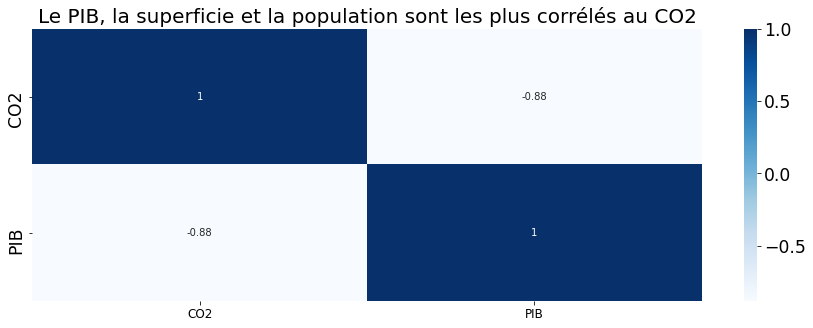

In [110]:
g=sns.heatmap(df_Alemania.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

In [111]:
df_Alemania.corr()["PIB"][0]

-0.8811905911409774

# Analyse bivariée

### Matrice de correlation

In [112]:
df_corr.head()

,CO2,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
0,414.371,537777811.1,652860.0,8996973.0,59.773194,0.000046,7.705245e-07
1,491.378,548888895.6,652860.0,9169410.0,59.860874,0.000054,8.952231e-07
2,689.396,546666677.8,652860.0,9351441.0,58.458015,0.000074,1.261090e-06
3,707.731,751111191.1,652860.0,9543205.0,78.706388,0.000074,9.422453e-07
4,839.743,800000044.4,652860.0,9744781.0,82.095231,0.000086,1.049679e-06


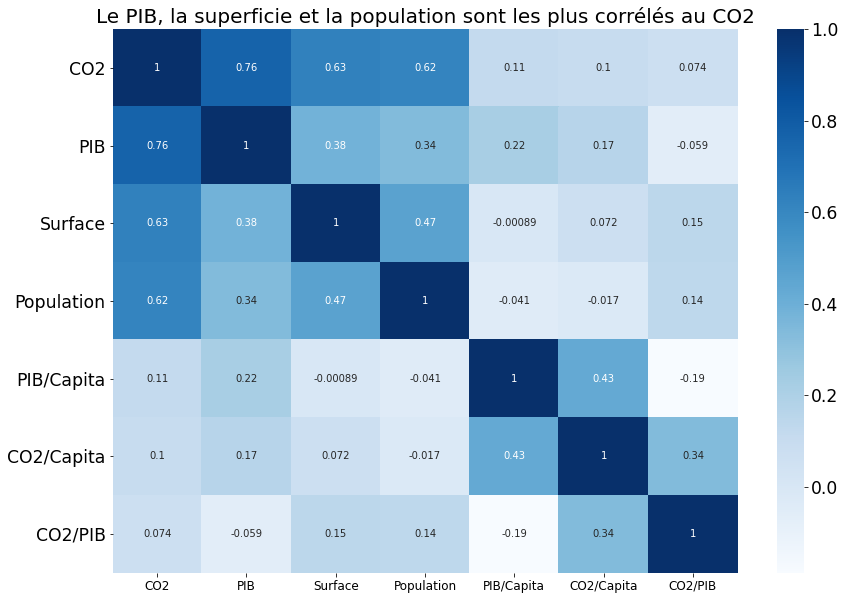

In [113]:
plt.figure(figsize=(14,10))
g=sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

### Tableau de contingence 2016

In [114]:
df_cont16 = df_all[df_all['Year']=="2016"]

t_contingence2016 = pd.crosstab(df_cont16['Region'],
                            df_cont16['IncomeGroup'], 
                               margins = False)
print(t_contingence2016)

IncomeGroup                 High income  ...  Upper middle income
Region                                   ...                     
East Asia & Pacific                  14  ...                   10
Europe & Central Asia                38  ...                   15
Latin America & Caribbean            17  ...                   20
Middle East & North Africa            8  ...                    5
North America                         3  ...                    0
South Asia                            0  ...                    1
Sub-Saharan Africa                    2  ...                    5

[7 rows x 4 columns]


### Tableau de contingence 1960

In [115]:
df_cont60 = df_all[df_all['Year']=="1960"]

t_contingence1960 = pd.crosstab(df_cont60['Region'],
                            df_cont60['IncomeGroup'], 
                               margins = False)
print(t_contingence1960)

IncomeGroup                 High income  ...  Upper middle income
Region                                   ...                     
East Asia & Pacific                  14  ...                   10
Europe & Central Asia                38  ...                   15
Latin America & Caribbean            17  ...                   20
Middle East & North Africa            8  ...                    5
North America                         3  ...                    0
South Asia                            0  ...                    1
Sub-Saharan Africa                    2  ...                    5

[7 rows x 4 columns]


## Nuage des points

In [116]:
df_all2016 = df_all[df_all["Year"]=="2016"]

## Bivarie entre PIB et CO2

### Hypothèse : les points orange representent la Chine et les rouges les Etats Unis

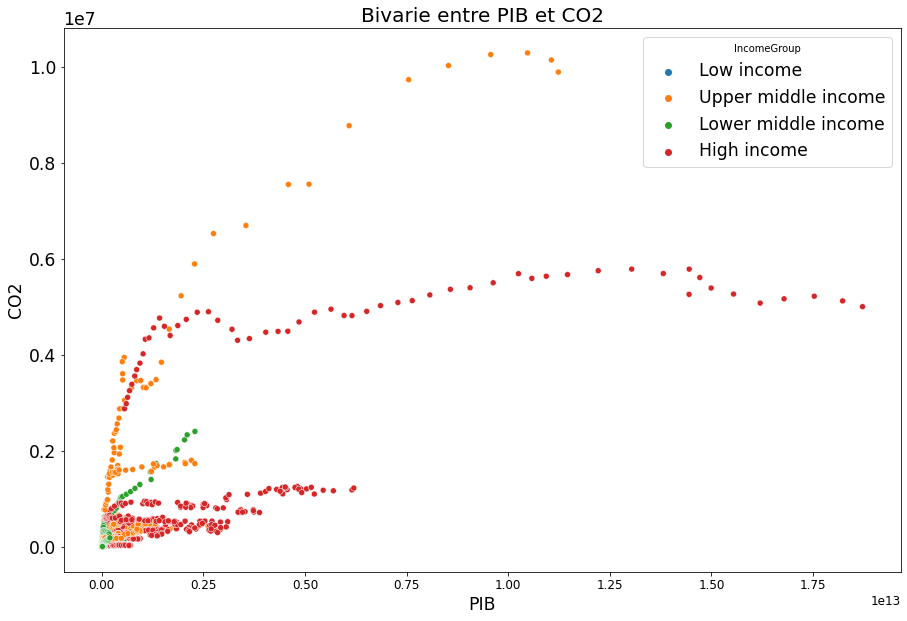

In [117]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Bivarie entre PIB et CO2')
g.title.set_size(20)

### le même pour 2016

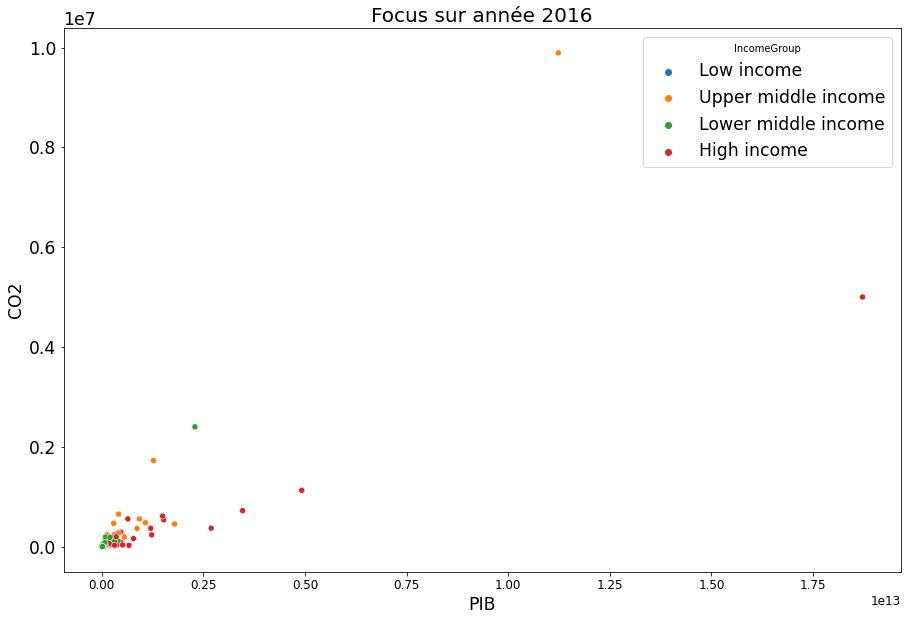

In [118]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all2016, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Focus sur année 2016')
g.title.set_size(20)

#### On voit qu'il y a deux pays qui sont des valeurs Extremes (outliers)

## Bivarie entre Population et CO2

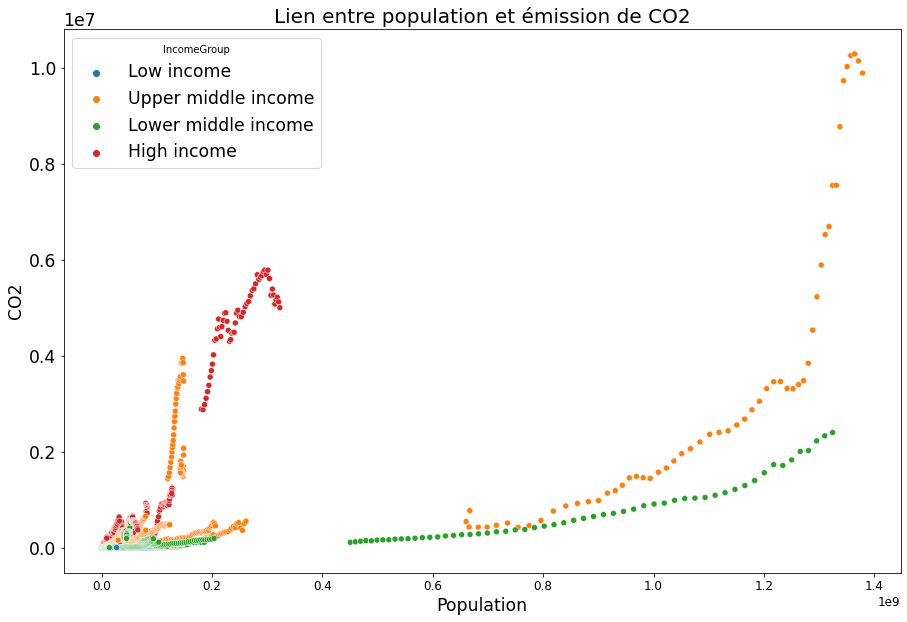

In [119]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="Population", y="CO2", hue="IncomeGroup")
g.set(title='Lien entre population et émission de CO2')
g.title.set_size(20)

## Top 10 des pays les plus polluants en 2016

In [120]:
df_all2016['pctg_CO2_2016'] = (df_all2016['CO2'] / df_all2016['CO2'].sum())*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_all2016 = df_all2016.sort_values(by="pctg_CO2_2016", ascending = False)

In [122]:
df_all2016.head(10)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,pctg_CO2_2016
2393,China,CHN,East Asia & Pacific,Upper middle income,2016,9893037.952,1.368487e+07,1.671832e+07,1.123330e+13,9600012.9,1.378665e+09,8147.954724,0.007176,8.806885e-07,30.081164
11855,United States,USA,North America,High income,2016,5006302.077,5.551809e+06,1.177276e+07,1.871500e+13,9831510.0,3.229413e+08,57951.706278,0.015502,2.675021e-07,15.222361
5129,India,IND,South Asia,Lower middle income,2016,2407671.526,2.736913e+06,4.229048e+06,2.294800e+12,3287259.0,1.324510e+09,1732.565788,0.001818,1.049186e-06,7.320862
9290,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2016,1732026.776,5.639908e+06,1.671832e+07,1.276790e+12,17098250.0,1.443424e+08,8845.564620,0.011999,1.356548e-06,5.266469
5642,Japan,JPN,East Asia & Pacific,High income,2016,1135886.253,1.368487e+07,1.177276e+07,4.922540e+12,377974.0,1.269945e+08,38761.832785,0.008944,2.307521e-07,3.453821
4217,Germany,DEU,Europe & Central Asia,High income,2016,727972.840,5.639908e+06,1.177276e+07,3.467500e+12,357580.0,8.234867e+07,42107.541532,0.008840,2.099417e-07,2.213503
5243,"Iran, Islamic Rep.",IRN,Middle East & North Africa,Upper middle income,2016,661710.150,2.608737e+06,1.671832e+07,4.179840e+11,1745150.0,7.956402e+07,5253.430144,0.008317,1.583099e-06,2.012022
5984,"Korea, Rep.",KOR,East Asia & Pacific,High income,2016,620302.386,1.368487e+07,1.177276e+07,1.500110e+12,100370.0,5.121780e+07,29288.839273,0.012111,4.135046e-07,1.886116
9575,Saudi Arabia,SAU,Middle East & North Africa,High income,2016,563449.218,2.608737e+06,1.177276e+07,6.449360e+11,2149690.0,3.244257e+07,19879.311665,0.017368,8.736514e-07,1.713246
5186,Indonesia,IDN,East Asia & Pacific,Upper middle income,2016,563324.540,1.368487e+07,1.671832e+07,9.318770e+11,1916862.2,2.615542e+08,3562.844364,0.002154,6.045053e-07,1.712867


### Conserver que les dix les plus polluants en 2016

In [160]:
df_top10 = df_all2016.head(6)

In [161]:
df_top10 = df_all2016.head(10)

In [162]:
df_top10['Country'].unique().tolist()

['China',
 'United States',
 'India',
 'Russian Federation',
 'Japan',
 'Germany',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Saudi Arabia',
 'Indonesia']

In [175]:
df_top6 = df_all2016.head(6)

In [176]:
df_top6['Country'].unique().tolist()

['China', 'United States', 'India', 'Russian Federation', 'Japan', 'Germany']

In [165]:
china_germany = ['China', 'Germany']

In [166]:
ch_ger = df_all[df_all['Country'].isin(china_germany)]

In [167]:
ch_ger

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2.708982e+06,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,1.307389e-05
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2.543501e+06,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,1.102879e-05
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2.530285e+06,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,9.327791e-06
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2.659411e+06,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,8.612172e-06
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2.818761e+06,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,7.317621e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,Germany,DEU,Europe & Central Asia,High income,2012,738141.431,6654354.553,1.278680e+07,3.527340e+12,357580.0,80425823.0,43858.301581,0.009178,2.092629e-07
4214,Germany,DEU,Europe & Central Asia,High income,2013,757961.566,6501902.695,1.279028e+07,3.732740e+12,357580.0,80645605.0,46285.721336,0.009399,2.030577e-07
4215,Germany,DEU,Europe & Central Asia,High income,2014,720363.815,6273991.311,1.270110e+07,3.883920e+12,357580.0,80982500.0,47959.991356,0.008895,1.854734e-07
4216,Germany,DEU,Europe & Central Asia,High income,2015,727045.089,5600213.064,1.200871e+07,3.356240e+12,357580.0,81686611.0,41086.782263,0.008900,2.166249e-07


In [168]:
df_all_top = df_all[df_all['Country'].isin(df_top10['Country'].unique().tolist())]

In [169]:
df_all_top.head(10)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,0.000013
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,0.000011
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,0.000009
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,0.000009
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,0.000007
2342,China,CHN,East Asia & Pacific,Upper middle income,1965,475972.933,1142956.229,3008249.119,7.043627e+10,9600012.9,715185000.0,98.486778,0.000666,0.000007
2343,China,CHN,East Asia & Pacific,Upper middle income,1966,522789.522,1234513.885,3209105.377,7.672029e+10,9600012.9,735400000.0,104.324566,0.000711,0.000007
2344,China,CHN,East Asia & Pacific,Upper middle income,1967,433234.048,1243828.065,3265848.535,7.288163e+10,9600012.9,754550000.0,96.589532,0.000574,0.000006
2345,China,CHN,East Asia & Pacific,Upper middle income,1968,468928.626,1381505.580,3432121.316,7.084654e+10,9600012.9,774510000.0,91.472718,0.000605,0.000007
2346,China,CHN,East Asia & Pacific,Upper middle income,1969,577237.138,1609468.302,3689918.750,7.970591e+10,9600012.9,796025000.0,100.129903,0.000725,0.000007


In [170]:
df_all_top['CO2/surface'] = df_all_top['CO2']/df_all_top['Surface']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
df_all_top['CO2/population'] = df_all_top['CO2']/df_all_top['Population']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
df_all_top = df_all_top.drop_duplicates()

In [173]:
df_all_top['CO2/PIB'] = df_all_top['CO2']/df_all_top['PIB']

In [174]:
df_all_top.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,0.000013,0.081326,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,0.000011,0.057507,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,0.000009,0.045871,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,0.000009,0.045489,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,0.000007,0.045513,0.000626


## Evolution des emissions de CO2/surface du top 10 de 2016

In [138]:
ch_ger

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2.708982e+06,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,1.307389e-05
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2.543501e+06,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,1.102879e-05
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2.530285e+06,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,9.327791e-06
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2.659411e+06,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,8.612172e-06
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2.818761e+06,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,7.317621e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,Germany,DEU,Europe & Central Asia,High income,2012,738141.431,6654354.553,1.278680e+07,3.527340e+12,357580.0,80425823.0,43858.301581,0.009178,2.092629e-07
4214,Germany,DEU,Europe & Central Asia,High income,2013,757961.566,6501902.695,1.279028e+07,3.732740e+12,357580.0,80645605.0,46285.721336,0.009399,2.030577e-07
4215,Germany,DEU,Europe & Central Asia,High income,2014,720363.815,6273991.311,1.270110e+07,3.883920e+12,357580.0,80982500.0,47959.991356,0.008895,1.854734e-07
4216,Germany,DEU,Europe & Central Asia,High income,2015,727045.089,5600213.064,1.200871e+07,3.356240e+12,357580.0,81686611.0,41086.782263,0.008900,2.166249e-07


[Text(0.5, 1.0, 'Emissions de CO2/PIB des 10 les plus polluants en 2016')]

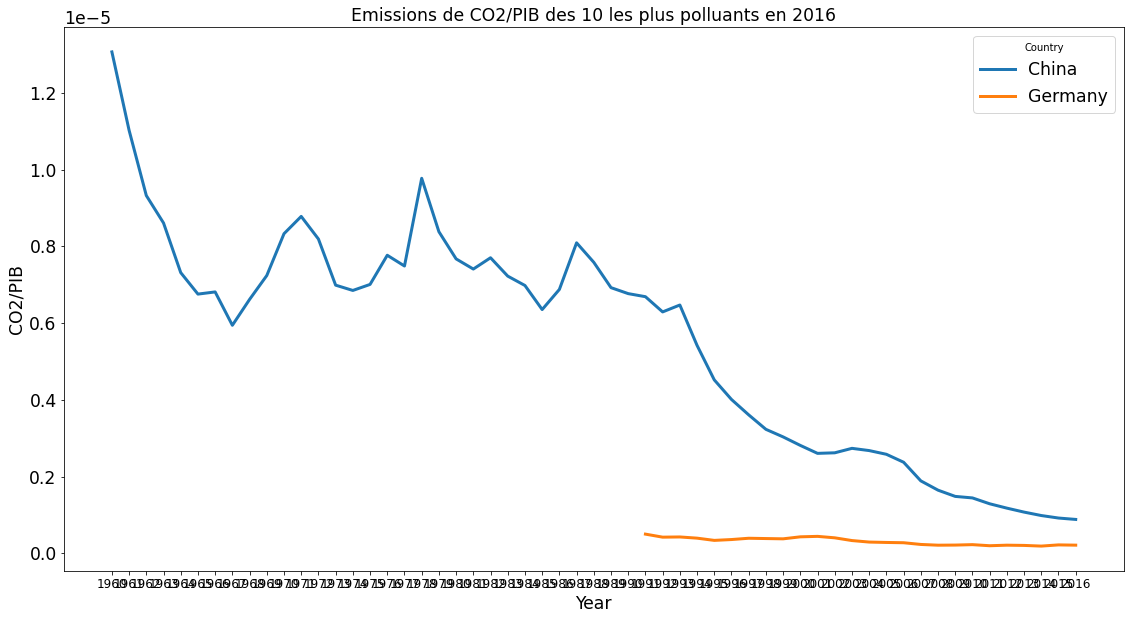

In [139]:
plt.figure(figsize=(19,10))

g = sns.lineplot(data=ch_ger, x="Year", y="CO2/PIB", hue="Country")

g.set(title='Emissions de CO2/PIB des 10 les plus polluants en 2016')
# g.title.set_size(30)
# g.xaxis.label.set_size(16)
# g.yaxis.label.set_size(16)
# # g.legend(fontsize=100)
# g.legend(fontsize="larger")
# g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
# g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='x-large')
# g.set_yticklabels(labelsy.astype(int),
#     fontweight='light',
#     fontsize='x-large')

[Text(0.5, 1.0, 'Emissions de CO2/PIB des 10 les plus polluants en 2016')]

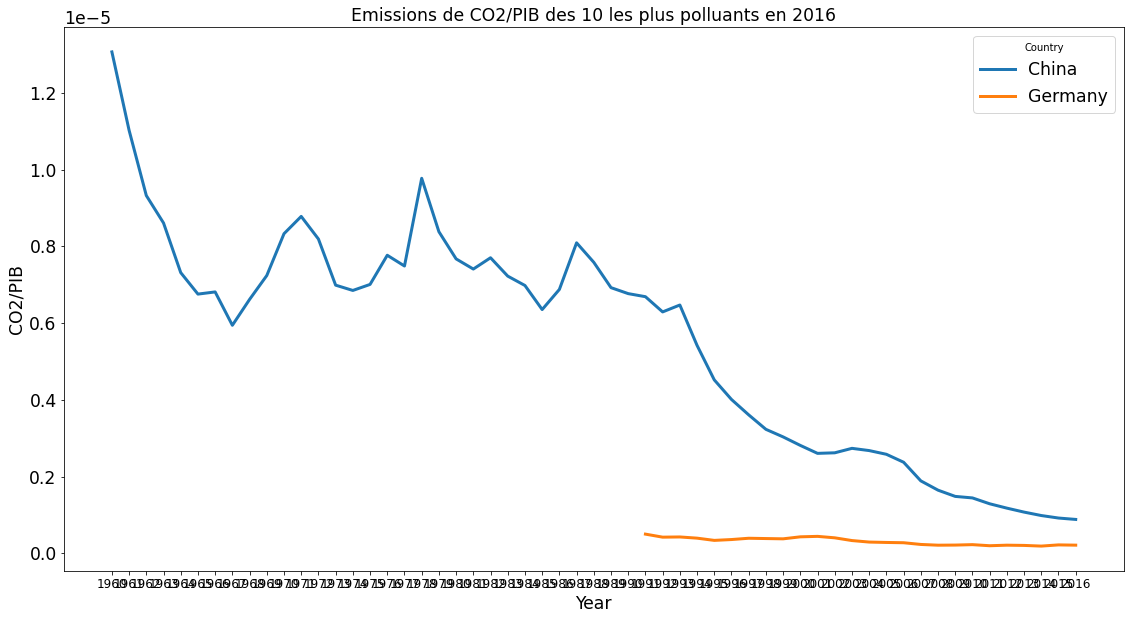

In [140]:
plt.figure(figsize=(19,10))

g = sns.lineplot(data=ch_ger, x="Year", y="CO2/PIB", hue="Country")

g.set(title='Emissions de CO2/PIB des 10 les plus polluants en 2016')
# g.title.set_size(30)
# g.xaxis.label.set_size(16)
# g.yaxis.label.set_size(16)
# # g.legend(fontsize=100)
# g.legend(fontsize="larger")
# g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
# g.grid()
# g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='x-large')
# g.set_yticklabels(labelsy.astype(int),
#     fontweight='light',
#     fontsize='x-large')

In [141]:
ch_ger['CO2/surface'] = ch_ger['CO2']/ch_ger['Surface']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0, '151645.118'),
 Text(0, 0, '162624.11599999998'),
 Text(0, 0, '179019.27300000004'),
 Text(0, 0, '194453.67599999998'),
 Text(0, 0, '191982.11800000005'),
 Text(0, 0, '209767.068'),
 Text(0, 0, '216364.001'),
 Text(0, 0, '219829.316')]

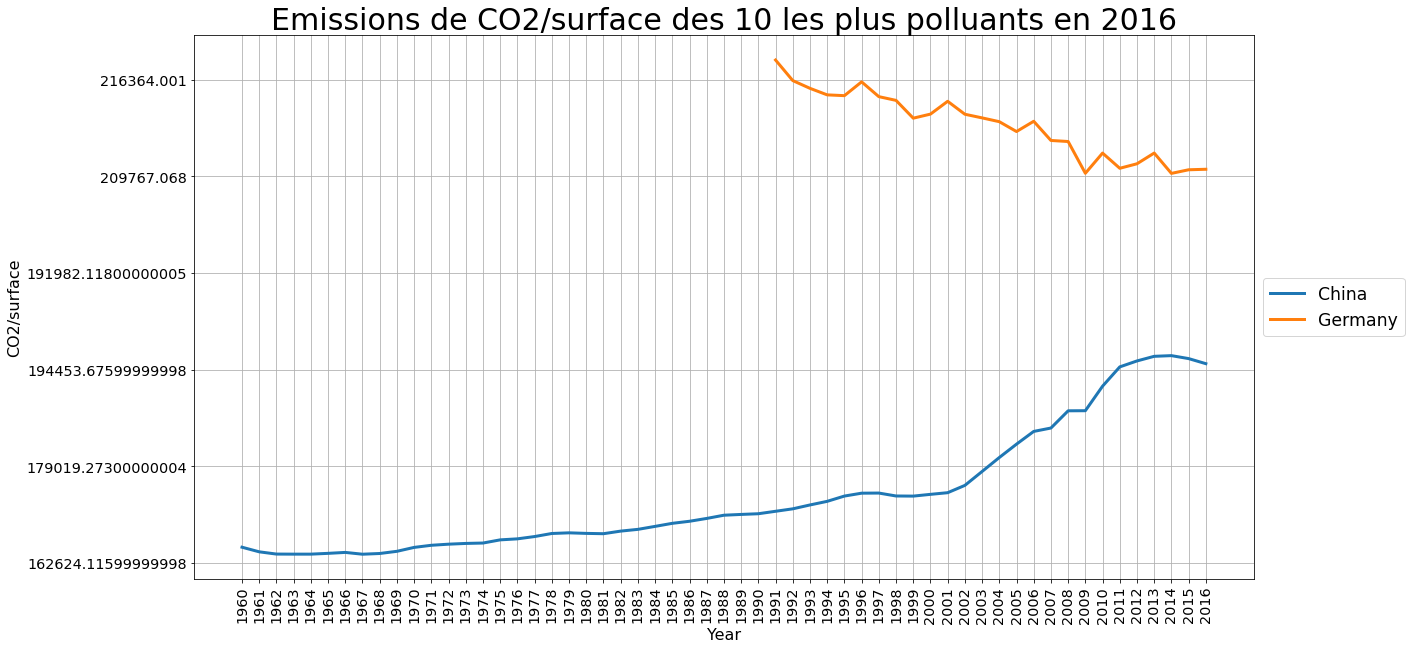

In [142]:
plt.figure(figsize=(19,10))

g = sns.lineplot(data=ch_ger, x="Year", y="CO2/surface", hue="Country")

g.set(title='Emissions de CO2/surface des 10 les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
# g.legend(fontsize=100)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy,
    fontweight='light',
    fontsize='x-large')



## Evolution des emissions de CO2/population du top 10 de 2016

In [143]:
ch_ger

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2.708982e+06,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,1.307389e-05,0.081326
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2.543501e+06,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,1.102879e-05,0.057507
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2.530285e+06,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,9.327791e-06,0.045871
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2.659411e+06,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,8.612172e-06,0.045489
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2.818761e+06,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,7.317621e-06,0.045513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,Germany,DEU,Europe & Central Asia,High income,2012,738141.431,6654354.553,1.278680e+07,3.527340e+12,357580.0,80425823.0,43858.301581,0.009178,2.092629e-07,2.064269
4214,Germany,DEU,Europe & Central Asia,High income,2013,757961.566,6501902.695,1.279028e+07,3.732740e+12,357580.0,80645605.0,46285.721336,0.009399,2.030577e-07,2.119698
4215,Germany,DEU,Europe & Central Asia,High income,2014,720363.815,6273991.311,1.270110e+07,3.883920e+12,357580.0,80982500.0,47959.991356,0.008895,1.854734e-07,2.014553
4216,Germany,DEU,Europe & Central Asia,High income,2015,727045.089,5600213.064,1.200871e+07,3.356240e+12,357580.0,81686611.0,41086.782263,0.008900,2.166249e-07,2.033238


[Text(0, 0, '0.0005741621469750181'),
 Text(0, 0, '0.0006054519967463299'),
 Text(0, 0, '0.0006256460539410472'),
 Text(0, 0, '0.0006400018993602849'),
 Text(0, 0, '0.0006614281643810925'),
 Text(0, 0, '0.0006655242112180764'),
 Text(0, 0, '0.0007108913815610553'),
 Text(0, 0, '0.0007251495091234571')]

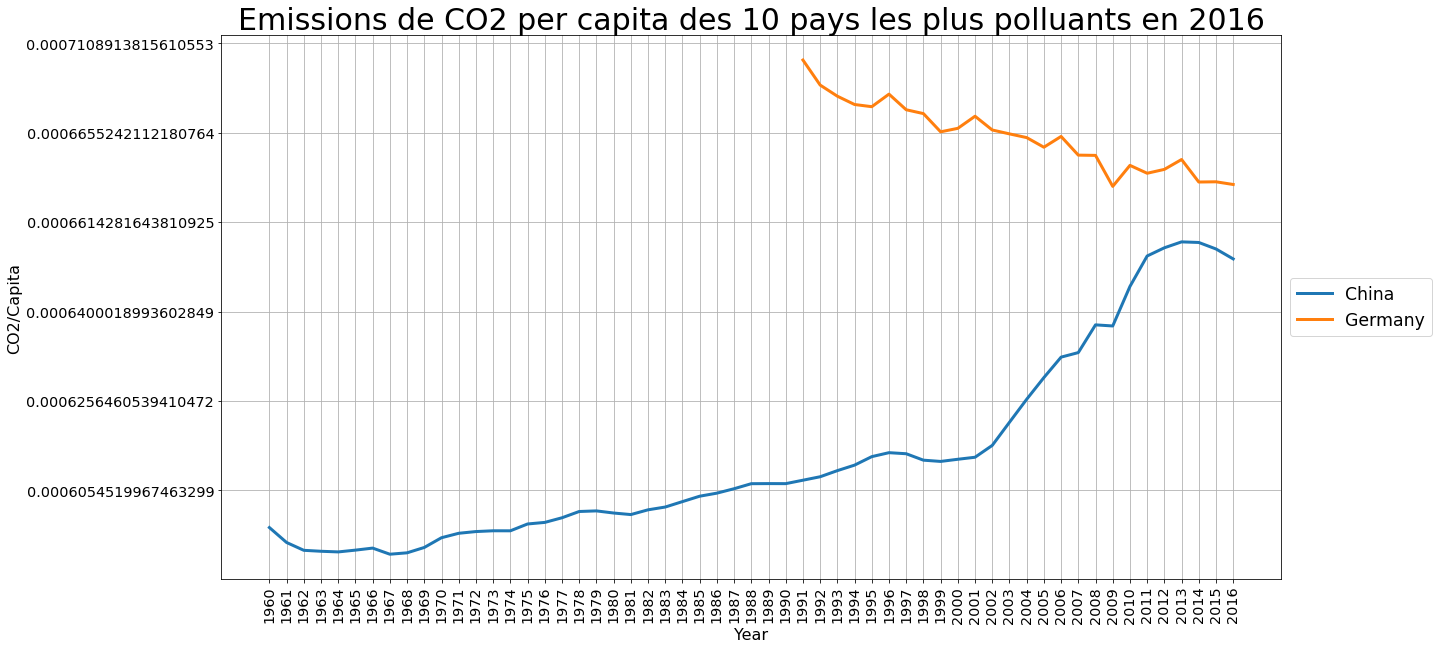

In [144]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=ch_ger, x="Year", y="CO2/Capita", hue="Country")

labels = sorted(ch_ger["Year"].unique())
labelsy = sorted(ch_ger["CO2/Capita"].unique())

g.set(title='Emissions de CO2 per capita des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy,
    fontweight='light',
    fontsize='x-large')


In [145]:
df_all_top['Country'].unique()

array(['China', 'Germany', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Japan', 'Korea, Rep.', 'Russian Federation', 'Saudi Arabia',
       'United States'], dtype=object)

In [146]:
emisions_co2_capita_germany = df_all_top[df_all_top["Country"] == "Germany"]
emisions_co2_capita_china = df_all_top[df_all_top["Country"] == "China"]
emisions_co2_capita_china.drop_duplicates()
emisions_co2_capita_china.head()

# df_co2 = df1.merge(df2, how="left", on="Country Code")
emisions_co2_capita_china_merge = emisions_co2_capita_china.merge(df_enegy_chine_melt, how="left", on=["Country Code", "Year"])
emisions_co2_capita_china_merge.drop(["Country_y"], axis=1, inplace=True)

In [147]:
emisions_co2_capita_germany_merge = emisions_co2_capita_germany.merge(df_enegy_germa_melt, how="left", on=["Country Code", "Year"])


In [148]:
emisions_co2_capita_germany_merge

,Country_x,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population,Country_y,value
0,Germany,DEU,Europe & Central Asia,High income,1960,NaN,3166989.882,5.163044e+06,NaN,357580.0,72814900.0,NaN,NaN,NaN,NaN,NaN,Germany,1952.588632
1,Germany,DEU,Europe & Central Asia,High income,1961,NaN,3275210.386,5.277048e+06,NaN,357580.0,73377632.0,NaN,NaN,NaN,NaN,NaN,Germany,1994.324633
2,Germany,DEU,Europe & Central Asia,High income,1962,NaN,3457973.666,5.527628e+06,NaN,357580.0,74025784.0,NaN,NaN,NaN,NaN,NaN,Germany,2124.848539
3,Germany,DEU,Europe & Central Asia,High income,1963,NaN,3702687.244,5.838454e+06,NaN,357580.0,74714353.0,NaN,NaN,NaN,NaN,NaN,Germany,2281.289928
4,Germany,DEU,Europe & Central Asia,High income,1964,NaN,3895069.065,6.133424e+06,NaN,357580.0,75318337.0,NaN,NaN,NaN,NaN,NaN,Germany,2341.146313
5,Germany,DEU,Europe & Central Asia,High income,1965,NaN,4076369.212,6.405791e+06,NaN,357580.0,75963695.0,NaN,NaN,NaN,NaN,NaN,Germany,2378.339732
6,Germany,DEU,Europe & Central Asia,High income,1966,NaN,4254640.417,6.686547e+06,NaN,357580.0,76600311.0,NaN,NaN,NaN,NaN,NaN,Germany,2387.684875
7,Germany,DEU,Europe & Central Asia,High income,1967,NaN,4397913.774,6.988543e+06,NaN,357580.0,76951336.0,NaN,NaN,NaN,NaN,NaN,Germany,2388.412347
8,Germany,DEU,Europe & Central Asia,High income,1968,NaN,4593672.902,7.361348e+06,NaN,357580.0,77294314.0,NaN,NaN,NaN,NaN,NaN,Germany,2561.522585
9,Germany,DEU,Europe & Central Asia,High income,1969,NaN,4831862.887,7.843354e+06,NaN,357580.0,77909682.0,NaN,NaN,NaN,NaN,NaN,Germany,2772.010929


In [149]:
emisions_co2_capita_germany_merge.dropna(subset=emisions_co2_capita_germany_merge.columns[[16]], inplace=True)

In [150]:
emisions_co2_capita_germany_merge

,Country_x,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population,Country_y,value
0,Germany,DEU,Europe & Central Asia,High income,1960,NaN,3166989.882,5.163044e+06,NaN,357580.0,72814900.0,NaN,NaN,NaN,NaN,NaN,Germany,1952.588632
1,Germany,DEU,Europe & Central Asia,High income,1961,NaN,3275210.386,5.277048e+06,NaN,357580.0,73377632.0,NaN,NaN,NaN,NaN,NaN,Germany,1994.324633
2,Germany,DEU,Europe & Central Asia,High income,1962,NaN,3457973.666,5.527628e+06,NaN,357580.0,74025784.0,NaN,NaN,NaN,NaN,NaN,Germany,2124.848539
3,Germany,DEU,Europe & Central Asia,High income,1963,NaN,3702687.244,5.838454e+06,NaN,357580.0,74714353.0,NaN,NaN,NaN,NaN,NaN,Germany,2281.289928
4,Germany,DEU,Europe & Central Asia,High income,1964,NaN,3895069.065,6.133424e+06,NaN,357580.0,75318337.0,NaN,NaN,NaN,NaN,NaN,Germany,2341.146313
5,Germany,DEU,Europe & Central Asia,High income,1965,NaN,4076369.212,6.405791e+06,NaN,357580.0,75963695.0,NaN,NaN,NaN,NaN,NaN,Germany,2378.339732
6,Germany,DEU,Europe & Central Asia,High income,1966,NaN,4254640.417,6.686547e+06,NaN,357580.0,76600311.0,NaN,NaN,NaN,NaN,NaN,Germany,2387.684875
7,Germany,DEU,Europe & Central Asia,High income,1967,NaN,4397913.774,6.988543e+06,NaN,357580.0,76951336.0,NaN,NaN,NaN,NaN,NaN,Germany,2388.412347
8,Germany,DEU,Europe & Central Asia,High income,1968,NaN,4593672.902,7.361348e+06,NaN,357580.0,77294314.0,NaN,NaN,NaN,NaN,NaN,Germany,2561.522585
9,Germany,DEU,Europe & Central Asia,High income,1969,NaN,4831862.887,7.843354e+06,NaN,357580.0,77909682.0,NaN,NaN,NaN,NaN,NaN,Germany,2772.010929


In [151]:
emisions_co2_capita_germany_merge.dropna(subset=emisions_co2_capita_germany_merge.columns[[16]], inplace=True)

In [152]:
emisions_co2_capita_germany_merge["(CO2/POPULATION)/Energy consomation/capita"] = emisions_co2_capita_germany_merge["value"]*emisions_co2_capita_germany_merge["CO2/Capita"]

# germany

In [154]:
emisions_co2_capita_germany_merge

,Country_x,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population,Country_y,value,(CO2/POPULATION)/Energy consomation/capita
0,Germany,DEU,Europe & Central Asia,High income,1960,NaN,3166989.882,5.163044e+06,NaN,357580.0,72814900.0,NaN,NaN,NaN,NaN,NaN,Germany,1952.588632,NaN
1,Germany,DEU,Europe & Central Asia,High income,1961,NaN,3275210.386,5.277048e+06,NaN,357580.0,73377632.0,NaN,NaN,NaN,NaN,NaN,Germany,1994.324633,NaN
2,Germany,DEU,Europe & Central Asia,High income,1962,NaN,3457973.666,5.527628e+06,NaN,357580.0,74025784.0,NaN,NaN,NaN,NaN,NaN,Germany,2124.848539,NaN
3,Germany,DEU,Europe & Central Asia,High income,1963,NaN,3702687.244,5.838454e+06,NaN,357580.0,74714353.0,NaN,NaN,NaN,NaN,NaN,Germany,2281.289928,NaN
4,Germany,DEU,Europe & Central Asia,High income,1964,NaN,3895069.065,6.133424e+06,NaN,357580.0,75318337.0,NaN,NaN,NaN,NaN,NaN,Germany,2341.146313,NaN
5,Germany,DEU,Europe & Central Asia,High income,1965,NaN,4076369.212,6.405791e+06,NaN,357580.0,75963695.0,NaN,NaN,NaN,NaN,NaN,Germany,2378.339732,NaN
6,Germany,DEU,Europe & Central Asia,High income,1966,NaN,4254640.417,6.686547e+06,NaN,357580.0,76600311.0,NaN,NaN,NaN,NaN,NaN,Germany,2387.684875,NaN
7,Germany,DEU,Europe & Central Asia,High income,1967,NaN,4397913.774,6.988543e+06,NaN,357580.0,76951336.0,NaN,NaN,NaN,NaN,NaN,Germany,2388.412347,NaN
8,Germany,DEU,Europe & Central Asia,High income,1968,NaN,4593672.902,7.361348e+06,NaN,357580.0,77294314.0,NaN,NaN,NaN,NaN,NaN,Germany,2561.522585,NaN
9,Germany,DEU,Europe & Central Asia,High income,1969,NaN,4831862.887,7.843354e+06,NaN,357580.0,77909682.0,NaN,NaN,NaN,NaN,NaN,Germany,2772.010929,NaN


In [155]:
emisions_co2_capita_china_merge.dropna(subset=emisions_co2_capita_china_merge.columns[[16]], inplace=True)

In [156]:
emisions_co2_capita_china_merge

,Country_x,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population,value
11,China,CHN,East Asia & Pacific,Upper middle income,1971,8.766330e+05,2.181993e+06,4.373858e+06,9.980096e+10,9600012.9,8.411050e+08,118.654578,0.001042,8.783814e-06,0.091316,0.001042,464.933157
12,China,CHN,East Asia & Pacific,Upper middle income,1972,9.315757e+05,2.295384e+06,4.603467e+06,1.136880e+11,9600012.9,8.620300e+08,131.884041,0.001081,8.194143e-06,0.097039,0.001081,477.168709
13,China,CHN,East Asia & Pacific,Upper middle income,1973,9.685427e+05,2.445977e+06,4.846648e+06,1.385440e+11,9600012.9,8.819400e+08,157.090051,0.001098,6.990867e-06,0.100890,0.001098,483.717375
14,China,CHN,East Asia & Pacific,Upper middle income,1974,9.880145e+05,2.472240e+06,5.027365e+06,1.441820e+11,9600012.9,9.003500e+08,160.139946,0.001097,6.852551e-06,0.102918,0.001097,486.167986
15,China,CHN,East Asia & Pacific,Upper middle income,1975,1.145607e+06,2.608894e+06,5.361462e+06,1.634320e+11,9600012.9,9.163950e+08,178.342309,0.001250,7.009689e-06,0.119334,0.001250,527.488337
16,China,CHN,East Asia & Pacific,Upper middle income,1976,1.196194e+06,2.729179e+06,5.625398e+06,1.539400e+11,9600012.9,9.306850e+08,165.405051,0.001285,7.770519e-06,0.124603,0.001285,537.174732
17,China,CHN,East Asia & Pacific,Upper middle income,1977,1.310311e+06,2.927447e+06,5.920184e+06,1.749380e+11,9600012.9,9.434550e+08,185.422728,0.001389,7.490144e-06,0.136491,0.001389,577.211011
18,China,CHN,East Asia & Pacific,Upper middle income,1978,1.462169e+06,3.087918e+06,6.261417e+06,1.495410e+11,9600012.9,9.561650e+08,156.396647,0.001529,9.777710e-06,0.152309,0.001529,617.154901
19,China,CHN,East Asia & Pacific,Upper middle income,1979,1.494860e+06,3.205988e+06,6.411097e+06,1.782810e+11,9600012.9,9.690050e+08,183.983571,0.001543,8.384852e-06,0.155714,0.001543,619.043662
20,China,CHN,East Asia & Pacific,Upper middle income,1980,1.467192e+06,3.192938e+06,6.517300e+06,1.911490e+11,9600012.9,9.812350e+08,194.804507,0.001495,7.675648e-06,0.152832,0.001495,609.455196


In [157]:
emisions_co2_capita_china_merge["(CO2/POPULATION)/Energy consomation/capita"] = emisions_co2_capita_china_merge["value"]*emisions_co2_capita_china_merge["CO2/Capita"]

# China

In [158]:
emisions_co2_capita_china_merge

,Country_x,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population,value,(CO2/POPULATION)/Energy consomation/capita
11,China,CHN,East Asia & Pacific,Upper middle income,1971,8.766330e+05,2.181993e+06,4.373858e+06,9.980096e+10,9600012.9,8.411050e+08,118.654578,0.001042,8.783814e-06,0.091316,0.001042,464.933157,0.484572
12,China,CHN,East Asia & Pacific,Upper middle income,1972,9.315757e+05,2.295384e+06,4.603467e+06,1.136880e+11,9600012.9,8.620300e+08,131.884041,0.001081,8.194143e-06,0.097039,0.001081,477.168709,0.515665
13,China,CHN,East Asia & Pacific,Upper middle income,1973,9.685427e+05,2.445977e+06,4.846648e+06,1.385440e+11,9600012.9,8.819400e+08,157.090051,0.001098,6.990867e-06,0.100890,0.001098,483.717375,0.531216
14,China,CHN,East Asia & Pacific,Upper middle income,1974,9.880145e+05,2.472240e+06,5.027365e+06,1.441820e+11,9600012.9,9.003500e+08,160.139946,0.001097,6.852551e-06,0.102918,0.001097,486.167986,0.533505
15,China,CHN,East Asia & Pacific,Upper middle income,1975,1.145607e+06,2.608894e+06,5.361462e+06,1.634320e+11,9600012.9,9.163950e+08,178.342309,0.001250,7.009689e-06,0.119334,0.001250,527.488337,0.659426
16,China,CHN,East Asia & Pacific,Upper middle income,1976,1.196194e+06,2.729179e+06,5.625398e+06,1.539400e+11,9600012.9,9.306850e+08,165.405051,0.001285,7.770519e-06,0.124603,0.001285,537.174732,0.690422
17,China,CHN,East Asia & Pacific,Upper middle income,1977,1.310311e+06,2.927447e+06,5.920184e+06,1.749380e+11,9600012.9,9.434550e+08,185.422728,0.001389,7.490144e-06,0.136491,0.001389,577.211011,0.801655
18,China,CHN,East Asia & Pacific,Upper middle income,1978,1.462169e+06,3.087918e+06,6.261417e+06,1.495410e+11,9600012.9,9.561650e+08,156.396647,0.001529,9.777710e-06,0.152309,0.001529,617.154901,0.943754
19,China,CHN,East Asia & Pacific,Upper middle income,1979,1.494860e+06,3.205988e+06,6.411097e+06,1.782810e+11,9600012.9,9.690050e+08,183.983571,0.001543,8.384852e-06,0.155714,0.001543,619.043662,0.954983
20,China,CHN,East Asia & Pacific,Upper middle income,1980,1.467192e+06,3.192938e+06,6.517300e+06,1.911490e+11,9600012.9,9.812350e+08,194.804507,0.001495,7.675648e-06,0.152832,0.001495,609.455196,0.911288


In [159]:
df_Ger_Chine = df_all_top[df_all_top["Country"].isin(["Germany", "China"])]

In [160]:
df_Ger_Chine

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2.708982e+06,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,1.307389e-05,0.081326,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2.543501e+06,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,1.102879e-05,0.057507,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2.530285e+06,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,9.327791e-06,0.045871,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2.659411e+06,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,8.612172e-06,0.045489,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2.818761e+06,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,7.317621e-06,0.045513,0.000626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,Germany,DEU,Europe & Central Asia,High income,2012,738141.431,6654354.553,1.278680e+07,3.527340e+12,357580.0,80425823.0,43858.301581,0.009178,2.092629e-07,2.064269,0.009178
4214,Germany,DEU,Europe & Central Asia,High income,2013,757961.566,6501902.695,1.279028e+07,3.732740e+12,357580.0,80645605.0,46285.721336,0.009399,2.030577e-07,2.119698,0.009399
4215,Germany,DEU,Europe & Central Asia,High income,2014,720363.815,6273991.311,1.270110e+07,3.883920e+12,357580.0,80982500.0,47959.991356,0.008895,1.854734e-07,2.014553,0.008895
4216,Germany,DEU,Europe & Central Asia,High income,2015,727045.089,5600213.064,1.200871e+07,3.356240e+12,357580.0,81686611.0,41086.782263,0.008900,2.166249e-07,2.033238,0.008900


In [161]:
emision_germany = df_Ger_Chine[df_Ger_Chine["Country"] == "Germany"]
emision_china = df_Ger_Chine[df_Ger_Chine["Country"] == "China"]

In [162]:
emision_germany

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/PIB,CO2/surface,CO2/population
4161,Germany,DEU,Europe & Central Asia,High income,1960,NaN,3166989.882,5.163044e+06,NaN,357580.0,72814900.0,NaN,NaN,NaN,NaN,NaN
4162,Germany,DEU,Europe & Central Asia,High income,1961,NaN,3275210.386,5.277048e+06,NaN,357580.0,73377632.0,NaN,NaN,NaN,NaN,NaN
4163,Germany,DEU,Europe & Central Asia,High income,1962,NaN,3457973.666,5.527628e+06,NaN,357580.0,74025784.0,NaN,NaN,NaN,NaN,NaN
4164,Germany,DEU,Europe & Central Asia,High income,1963,NaN,3702687.244,5.838454e+06,NaN,357580.0,74714353.0,NaN,NaN,NaN,NaN,NaN
4165,Germany,DEU,Europe & Central Asia,High income,1964,NaN,3895069.065,6.133424e+06,NaN,357580.0,75318337.0,NaN,NaN,NaN,NaN,NaN
4166,Germany,DEU,Europe & Central Asia,High income,1965,NaN,4076369.212,6.405791e+06,NaN,357580.0,75963695.0,NaN,NaN,NaN,NaN,NaN
4167,Germany,DEU,Europe & Central Asia,High income,1966,NaN,4254640.417,6.686547e+06,NaN,357580.0,76600311.0,NaN,NaN,NaN,NaN,NaN
4168,Germany,DEU,Europe & Central Asia,High income,1967,NaN,4397913.774,6.988543e+06,NaN,357580.0,76951336.0,NaN,NaN,NaN,NaN,NaN
4169,Germany,DEU,Europe & Central Asia,High income,1968,NaN,4593672.902,7.361348e+06,NaN,357580.0,77294314.0,NaN,NaN,NaN,NaN,NaN
4170,Germany,DEU,Europe & Central Asia,High income,1969,NaN,4831862.887,7.843354e+06,NaN,357580.0,77909682.0,NaN,NaN,NaN,NaN,NaN


In [163]:
labels = emision_china["CO2"]
labels

2337    7.807263e+05
2338    5.520668e+05
2339    4.403590e+05
2340    4.366957e+05
2341    4.369230e+05
2342    4.759729e+05
2343    5.227895e+05
2344    4.332340e+05
2345    4.689286e+05
2346    5.772371e+05
2347    7.716175e+05
2348    8.766330e+05
2349    9.315757e+05
2350    9.685427e+05
2351    9.880145e+05
2352    1.145607e+06
2353    1.196194e+06
2354    1.310311e+06
2355    1.462169e+06
2356    1.494860e+06
2357    1.467192e+06
2358    1.451501e+06
2359    1.580261e+06
2360    1.667029e+06
2361    1.814908e+06
2362    1.966553e+06
2363    2.068969e+06
2364    2.209709e+06
2365    2.369502e+06
2366    2.408541e+06
2367    2.442919e+06
2368    2.564700e+06
2369    2.686532e+06
2370    2.878694e+06
2371    3.058241e+06
2372    3.320285e+06
2373    3.463089e+06
2374    3.469510e+06
2375    3.324345e+06
2376    3.318056e+06
2377    3.405180e+06
2378    3.487566e+06
2379    3.850269e+06
2380    4.540417e+06
2381    5.233539e+06
2382    5.896958e+06
2383    6.529292e+06
2384    6.697

In [164]:
print(emision_china["CO2"].min())
print(emision_china["CO2"].max())
print(emision_germany["CO2"].min())
print(emision_germany["CO2"].max())

433234.04799999995
10291926.88
720363.815
929973.202


In [165]:
emision_china["CO2_2"] = emision_china["CO2"].astype(int)/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
emision_germany["CO2_2"] = emision_germany["CO2"]/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


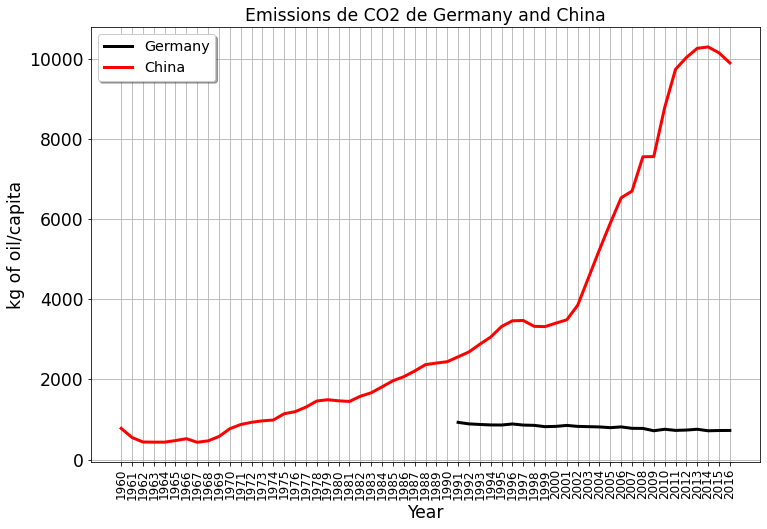

In [167]:
plt.rc('lines', linewidth=3, linestyle='-')


fig, ax = plt.subplots(figsize=(12, 8))

x = emision_germany["Year"]
y = emision_germany["CO2_2"]
ax.plot(x, y, label='Germany', color="black")


x = emision_china["Year"]
y = emision_china["CO2_2"]
ax.plot(x, y, color="r", label='China')



ax.set(xlabel='Year', ylabel='kg of oil/capita',
       title='Emissions de CO2 de Germany and China')
ax.grid()
ax.set_xticklabels(emision_china["Year"].unique(), rotation = 90)


legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('white')


plt.show()

In [168]:
sorted(df_Ger_Chine["CO2"].head(50))

[433234.04799999995,
 436695.696,
 436923.05,
 440359.029,
 468928.626,
 475972.93299999996,
 522789.52200000006,
 552066.85,
 577237.1379999999,
 771617.474,
 780726.302,
 876633.02,
 931575.681,
 968542.708,
 988014.478,
 1145607.47,
 1196193.735,
 1310310.775,
 1451501.2759999998,
 1462168.5790000001,
 1467192.369,
 1494859.884,
 1580260.6469999999,
 1667029.201,
 1814908.31,
 1966553.428,
 2068969.071,
 2209708.531,
 2369501.723,
 2408540.605,
 2442918.73,
 2564699.8,
 2686532.208,
 2878694.0089999996,
 3058241.33,
 3318055.6139999996,
 3320285.15,
 3324344.519,
 3405179.867,
 3463089.131,
 3469510.048,
 3487566.356,
 3850269.3260000004,
 4540417.061000001,
 5233538.733,
 5896957.705,
 6529291.517999999,
 6697654.489,
 7553070.247,
 7557789.676]

[Text(0, 0, '433234.04799999995'),
 Text(0, 0, '436695.696'),
 Text(0, 0, '436923.05'),
 Text(0, 0, '440359.029'),
 Text(0, 0, '468928.626'),
 Text(0, 0, '475972.93299999996'),
 Text(0, 0, '522789.52200000006'),
 Text(0, 0, '552066.85')]

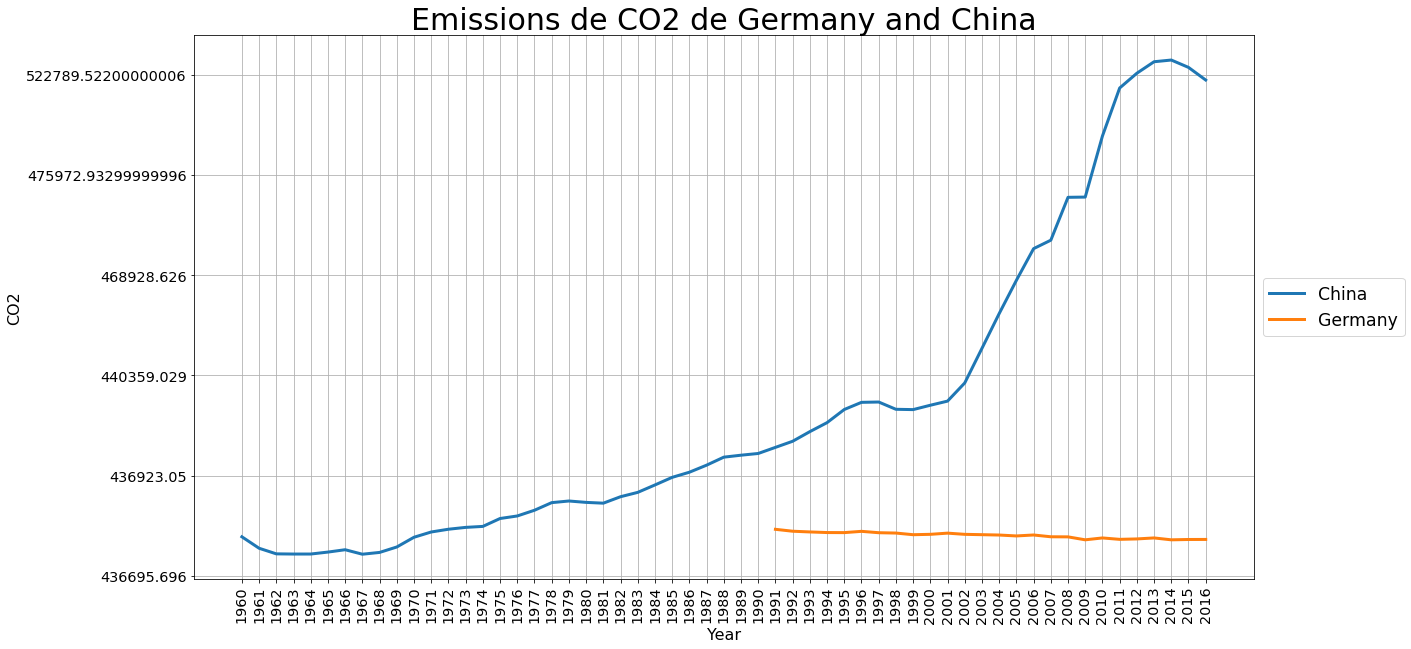

In [169]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_Ger_Chine, x="Year", y="CO2", hue="Country")

labels = sorted(df_Ger_Chine["Year"].unique())
labelsy = sorted(df_Ger_Chine["CO2"].unique())

g.set(title='Emissions de CO2 de Germany and China')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy,
    fontweight='light',
    fontsize='x-large')


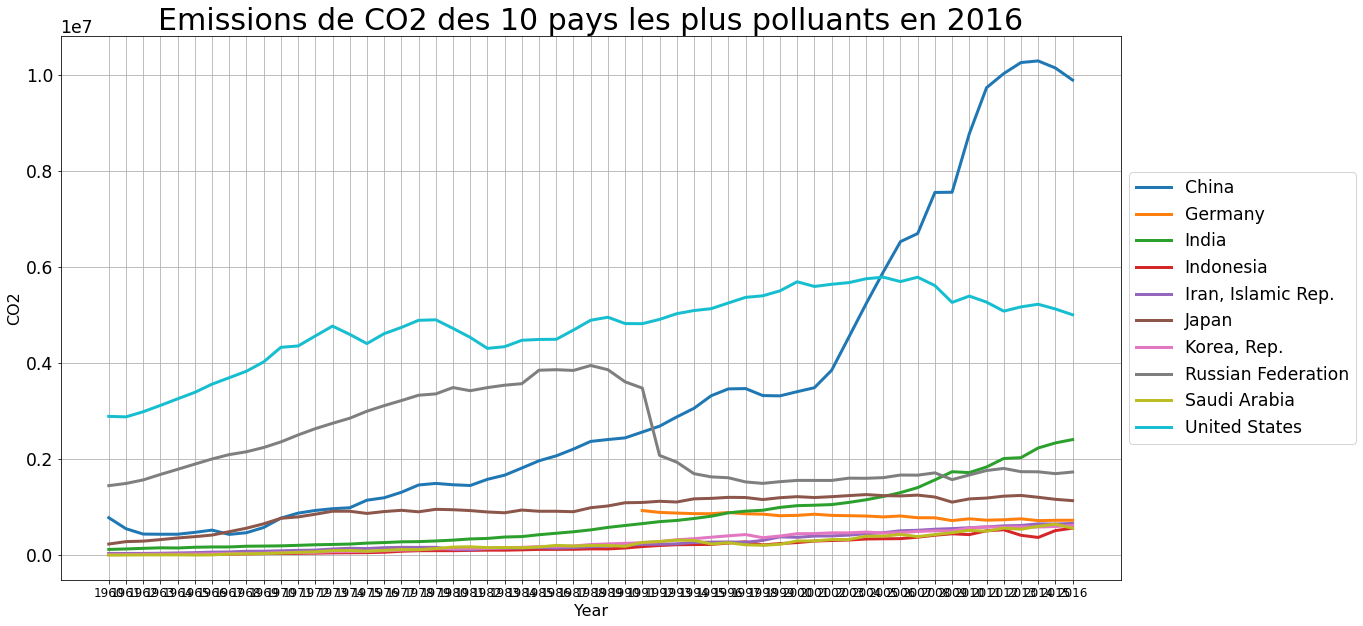

In [170]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2", hue="Country")

g.set(title='Emissions de CO2 des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
# g.set_xticklabels(labels,  rotation=90, 
#     horizontalalignment='center',
#     fontweight='light',
#     fontsize='x-large')
# g.set_yticklabels(labelsy.astype(int),
#     fontweight='light',
#     fontsize='x-large')



# TOP 6

In [177]:
df_top6 = df_all2016.head(6)

<Figure size 720x576 with 0 Axes>

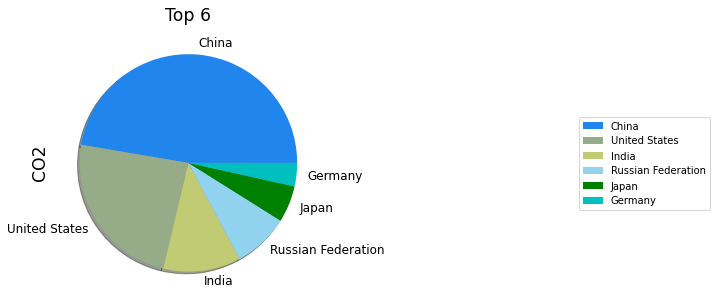

In [219]:
plt.figure(figsize=(10,8))
labels=df_top6['Country']
colors = ["#2085ec", '#96ab87','#c1cb73','#91d2ef','g', 'c']
textprops = {"fontsize":11}
df_top6.plot(kind='pie', y = 'CO2', x='Country',title="Top 6",labels = labels, shadow = True, colors = colors )
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

plt.show()